In [95]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, DateFormatter
import datetime as dt
from sklearn import preprocessing
from matplotlib.dates import HourLocator, DateFormatter

In [96]:
omsz_path = '/Users/varungandhi/Desktop/data_1/Data_OMSZ_10min.pkl'
df = pd.read_pickle(omsz_path)
df['idő (UTC)'] = pd.to_datetime(df['idő (UTC)'])
df_nd = df[(df['idő (UTC)'] >= '2020-11-20 16:22:00') & (df['idő (UTC)'] <= '2020-12-31 23:59:00')]
df_jm = df[(df['idő (UTC)'] >= '2021-01-01 00:00:00') & (df['idő (UTC)'] <= '2021-03-11 13:13:00')]

In [97]:
### for time intervals of fog for nov to dec
## 24 nov fog
##240 minutes added 
t_1 = 333
t_2 = 730
time_1 = df_nd['idő (UTC)'][t_1:t_2] 
#a_0 = df_nd['idő (UTC)'][498:499] #fog
#a_1 = df_nd['idő (UTC)'][532:533] #fog
#b_0 = df_nd['idő (UTC)'][511:512] #fog
#b_1 = df_nd['idő (UTC)'][612:613] #fog

#c = n_d['TIMESTAMP_UTC'][4988+1137+1]   #rain
#d = n_d['TIMESTAMP_UTC'][4988+1137+1180]  #rain

##29 nov fog
t_3 = 1101
t_4 = 1300
time_2 = df_nd['idő (UTC)'][t_3:t_4]
#a_2 =  df_nd['idő (UTC)'][1204:1205]
#b_2 =  df_nd['idő (UTC)'][1219:1220]


#foggy periods of jan and feb in consideration
#foggy period of jan 12
##no adding 240 minutes 
t_7 = 1494
t_8 = 1651
time_4 = df_jm['idő (UTC)'][t_7:t_8]

#y_1 = df_jm['idő (UTC)'][1609:1610]
#y_2 = df_jm['idő (UTC)'][1630:1631]

##longest foggy periods of feb 02
t_9 = 4650
t_10= 4855
time_5 = df_jm['idő (UTC)'][t_9:t_10]
#y_3 = df_jm['idő (UTC)'][4709:4710]
#y_4 = df_jm['idő (UTC)'][4818:4819]

##foggy period of feb 20
t_11 = 7104
t_12 = 7321
time_6= df_jm['idő (UTC)'][t_11:t_12]

In [98]:
#reading elte 1 minute data
df_1m = pd.read_pickle('/Users/varungandhi/Desktop/data_1/Data_ELTE_1min.pkl')

#reading garden 1 minute data
df_garden = pd.read_pickle('/Users/varungandhi/Desktop/data_1/Data_BME_garden.pkl')

In [99]:
df_1m.columns

Index(['TIMESTAMP', 'RECORD', 'PTemp_Avg', 'Batt_volt_Avg', 'rh_Avg(1)',
       'rh_Avg(2)', 'temp_Avg(1)', 'temp_Avg(2)', 'ws_Std(1)', 'ws_Std(2)',
       'ws_Avg(1)', 'ws_Avg(2)'],
      dtype='object')

In [100]:
# for january to 11 march only 
df_1j_m = df_1m[(df_1m['TIMESTAMP'] >= '2021-01-01 00:00:00') & (df_1m['TIMESTAMP'] <= '2021-03-11 13:13:00')]
df_2j_m = df_garden[(df_garden['TIMESTAMP_UTC'] >= '2021-01-01 00:00:00') & (df_garden['TIMESTAMP_UTC'] <= '2021-03-11 13:13:00')]

# for 20 nov to dec
df_1n_d = df_1m[(df_1m['TIMESTAMP'] >= '2020-11-20 16:22:00') & (df_1m['TIMESTAMP'] <= '2020-12-31 23:59:00')]
df_2n_d = df_garden[(df_garden['TIMESTAMP_UTC'] >= '2020-11-20 16:22:00') & (df_garden['TIMESTAMP_UTC'] <= '2020-12-31 23:59:00')]


In [101]:
df_1j_m.columns

Index(['TIMESTAMP', 'RECORD', 'PTemp_Avg', 'Batt_volt_Avg', 'rh_Avg(1)',
       'rh_Avg(2)', 'temp_Avg(1)', 'temp_Avg(2)', 'ws_Std(1)', 'ws_Std(2)',
       'ws_Avg(1)', 'ws_Avg(2)'],
      dtype='object')

In [102]:
df_2j_m.columns[0:100]

Index(['TIMESTAMP_UTC+2', 'TIMESTAMP_UTC', 'RECORD', 'kohms_Avg',
       'AirTC_1_Avg', 'RH_1_orig', 'RH_1_corr', 'RH1_corr_cut', 'AirTC_2_Avg',
       'RH_2', 'RH_2_corr', 'RH_2_corr_cut', 'SUp_Avg', 'Sup_corr', 'SDn_Avg',
       'SDn_corr', 'LUp_Avg', 'Lup_corr', 'LDn_Avg', 'LDn_corr', 'CNR1TC_Avg',
       'CNR1TK_Avg', 'SUp_Min', 'SUp_TMn', 'SDn_Min', 'SDn_TMn', 'LUp_Min',
       'LUp_TMn', 'LDn_Min', 'LDn_TMn', 'CNR1TC_Min', 'CNR1TC_TMn',
       'CNR1TK_Min', 'CNR1TK_TMn', 'SUp_Max', 'SUp_TMx', 'SDn_Max', 'SDn_TMx',
       'LUp_Max', 'LUp_TMx', 'LDn_Max', 'LDn_TMx', 'CNR1TC_Max', 'CNR1TC_TMx',
       'CNR1TK_Max', 'CNR1TK_TMx', 'SUp_Std', 'SDn_Std', 'LUp_Std', 'LDn_Std',
       'CNR1TC_Std', 'CNR1TK_Std', 'Shf_1_Avg', 'Shf_2_Avg', 'batt_volt_Avg',
       'T1_Avg', 'T2_Avg', 'T3_Avg', 'VW_Avg', 'PA_uS_Avg', 'VW_2_Avg',
       'PA_uS_2_Avg', 'mean_wind_speed', 'mean_wind_direction', 'std_wind_dir',
       'samples_TOT', 'diag_1_TOT', 'diag_2_TOT', 'diag_4_TOT', 'diag_8_TOT',
       '

In [103]:
df_1j_m = df_1j_m.drop(columns = ['TIMESTAMP','RECORD'])

df_1n_d = df_1n_d.drop(columns = ['TIMESTAMP', 'RECORD'])

df_2j_m = df_2j_m.drop(columns = ['RECORD'])
df_2n_d = df_2n_d.drop(columns = ['RECORD'])



In [104]:
df_1j_m.reset_index(inplace= True)
df_1n_d.reset_index(inplace= True)

df_2j_m.reset_index(inplace= True)
df_2n_d.reset_index(inplace= True)



In [105]:
#path and the files with sci
path = '/Users/varungandhi/Downloads/python_notebooks/'
#jan to march
file1_jan = path + 'ceilo1_jan.csv'
file1_feb = path + 'ceilo1_feb.csv'
file1_mar = path + 'ceilo1_mar.csv'

file2_jan = path + 'ceilo2_jan.csv'
file2_feb = path + 'ceilo2_feb.csv'
file2_mar = path + 'ceilo2_mar.csv'

#oct to nov
file1_oct = path + 'ceilo1_oct.csv'
file1_nov = path + 'ceilo1_nov.csv'
file1_dec = path + 'ceilo1_dec.csv'


file2_oct = path + 'ceilo2_oct.csv'
file2_nov = path + 'ceilo2_nov.csv'
file2_dec = path + 'ceilo2_dec.csv'

In [106]:
#january to march
j_1 = pd.read_csv(file1_jan)
f_1 = pd.read_csv(file1_feb)
m_1 = pd.read_csv(file1_mar)

j_2 = pd.read_csv(file2_jan)
f_2 = pd.read_csv(file2_feb)
m_2 = pd.read_csv(file2_mar)

#october to november
o_1 = pd.read_csv(file1_oct)
n_1 = pd.read_csv(file1_nov, sep = ';')
d_1 = pd.read_csv(file1_dec, sep = ';')

o_2 = pd.read_csv(file2_oct)
n_2 = pd.read_csv(file2_nov, sep = ';')
d_2 = pd.read_csv(file2_dec, sep = ';')

In [107]:
n_1['time'] = pd.to_datetime(n_1['time'])
d_1['time'] = pd.to_datetime(d_1['time'])

In [108]:
n_2['time'] = pd.to_datetime(n_2['time'])
d_2['time'] = pd.to_datetime(d_2['time'])

In [109]:
n_1 = n_1[(n_1['time'] >= '2020.11.20 16:22')]
n_2 = n_2[(n_2['time'] >= '2020.11.20 16:22')]

In [110]:
j_m_1 = pd.concat([j_1, f_1, m_1], axis = 0, ignore_index= True)
j_m_2 = pd.concat([j_2, f_2, m_2], axis = 0, ignore_index= True)

n_d_1 = pd.concat([n_1, d_1], axis = 0, ignore_index= True)
n_d_2 = pd.concat([n_2, d_2], axis = 0, ignore_index= True)

In [111]:
j_m_2['time']

0         2021-01-01 00:00:57
1         2021-01-01 00:01:57
2         2021-01-01 00:02:57
3         2021-01-01 00:03:57
4         2021-01-01 00:04:57
                 ...         
100148    2021-03-11 13:10:39
100149    2021-03-11 13:11:39
100150    2021-03-11 13:12:39
100151    2021-03-11 13:13:39
100152    2021-03-11 13:14:39
Name: time, Length: 100153, dtype: object

In [112]:
zj_m_1 = j_m_1[['bcc', 'cho', 'nn1', 'nn2', 'nn3','sci']]
zn_d_1 = n_d_1[['bcc', 'cho', 'nn1', 'nn2', 'nn3','sci']]

zj_m_2 = j_m_2[['pbl_l1', 'pbl_l2', 'pbl_l3', 'pbs_l1', 'pbs_l2', 'pbs_l3',
       'cbh_l1', 'cbh_l2', 'cbh_l3', 'cbe_l1', 'cbe_l2', 'cbe_l3', 'cdp_l1',
       'cdp_l2', 'cdp_l3', 'cde_l1', 'cde_l2', 'cde_l3']]
zn_d_2 = n_d_2[['pbl_l1', 'pbl_l2', 'pbl_l3', 'pbs_l1', 'pbs_l2', 'pbs_l3',
       'cbh_l1', 'cbh_l2', 'cbh_l3', 'cbe_l1', 'cbe_l2', 'cbe_l3', 'cdp_l1',
       'cdp_l2', 'cdp_l3', 'cde_l1', 'cde_l2', 'cde_l3']]

In [113]:
zj_m = pd.concat([zj_m_1, zj_m_2], axis = 1, ignore_index= False)
zn_d = pd.concat([zn_d_1, zn_d_2], axis = 1, ignore_index= False)
#zn_d

In [114]:
j_m = pd.concat([df_1j_m, df_2j_m,zj_m], axis = 1, ignore_index= False)
n_d = pd.concat([df_1n_d, df_2n_d,zn_d], axis = 1, ignore_index= False)

In [115]:
j_m['TIMESTAMP_UTC'] = pd.to_datetime(j_m['TIMESTAMP_UTC'])
n_d['TIMESTAMP_UTC'] = pd.to_datetime(n_d['TIMESTAMP_UTC'])

In [116]:
##corrections of cloud base height and relative humidity
min_max_scaler = preprocessing.MinMaxScaler()
x1 = n_d['cbh_l1'].values
x2 = j_m['cbh_l1'].values
x3 = n_d['pbl_l1'].values
x4 = j_m['pbl_l1'].values

x5 = n_d['kohms_Avg'].values
x5 = x5.reshape(-1,1)
x6 = j_m['kohms_Avg'].values
x6 = x6.reshape(-1,1)

r1 = n_d['rh_Avg(1)'].values
r2 = n_d['rh_Avg(2)'].values
r3 = j_m['rh_Avg(1)'].values
r4 = j_m['rh_Avg(2)'].values

for i in range(len(n_d['cbe_l1'])):
    if x1[i] == -1:
        x1[i] = float('NAN')
    if x3[i] == -1:
        x3[i] = float('NAN')
    if r1[i] >= 85:
        r1[i] = 85+ ((r1[i] -85) * 1.238)
    
    if r1[i] > 100.0:
        r1[i] = 100.0
        
    if r2[i] >= 85:
        r2[i] = 85+ ((r2[i] -85) * 0.9285)
        
    if r2[i] > 100.0:
        r2[i] = 100.0
        
    if x5[i] == -7999.:
        x5[i] = float('NAN')

for i in range(len(j_m['cbe_l1'])):
    if x2[i] ==-1:
        x2[i] = float('NAN')
    if x4[i] ==-1:
        x4[i] = float('NAN')
        
    if r3[i] >= 85:
        r3[i] = 85+ ((r3[i] -85) * 1.238)
    if r3[i] >100.0:
        r3[i] = 100.0
        
    if r4[i] >= 85:
        r4[i] = 85+ ((r4[i] -85) * 0.9285)
        
    if r4[i] > 100.0:
        r4[i] = 100.0
    if x6[i] == -7999.:
        x6[i] = float('NAN')


In [117]:
#substitution
n_d['r_9']  = r1  
n_d['r_24'] = r2

j_m['r_9']  = r3  
j_m['r_24'] = r4

In [118]:
#substitution
j_m['cbh_cor'] = x2 
n_d['cbh_cor'] = x1

j_m['pbl_cor'] = x4 
n_d['pbl_cor'] = x3

n_d['LW'] = min_max_scaler.fit_transform(x5)
j_m['LW'] = min_max_scaler.fit_transform(x6)


In [119]:
#sw and lw rad budget

n_d['sw'] = n_d['Sup_corr'] - n_d['SDn_corr']
n_d['lw'] = n_d['Lup_corr'] - n_d['LDn_corr']
j_m['sw'] = j_m['Sup_corr'] - j_m['SDn_corr']
j_m['lw'] = j_m['Lup_corr'] - j_m['LDn_corr']


In [120]:
### for time intervals of fog for nov to dec
## 24 nov fog
##240 minutes added 
t1 = 4598
t2 = 7299
time1 = n_d['TIMESTAMP_UTC'][t1:t2] 
a = n_d['TIMESTAMP_UTC'][4988] #fog
a1 = n_d['TIMESTAMP_UTC'][5333] #fog
b = n_d['TIMESTAMP_UTC'][4988+130] #fog
b1 = n_d['TIMESTAMP_UTC'][5333+800] #fog

c = n_d['TIMESTAMP_UTC'][4988+1137 +1]   #rain
d = n_d['TIMESTAMP_UTC'][4988+1137+1180]  #rain

#29 nov fog
t3 = 11858
t4 = 12699
time2 = n_d['TIMESTAMP_UTC'][t3:t4]
a2 =  n_d['TIMESTAMP_UTC'][12051]
b2 =  n_d['TIMESTAMP_UTC'][12051+387]
#print(time1,time2)

#ax1.scatter(n_d['TIMESTAMP_UTC'][11950 : 12500],  n_d['RH_2_corr'][11950 : 12500], label = 'rh (1m)', color = 'r', linewidth = 0.5)
#ax1.scatter(n_d['TIMESTAMP_UTC'][11950 : 12500],  n_d['RH_1_corr'][11950 : 12500], label = 'rh (5m)', color = 'g', linewidth = 0.5)
#ax1.scatter(n_d['TIMESTAMP_UTC'][11950 : 12500],  n_d['rh_Avg(2)'][11950 : 12500], label = 'rh (9m)', color = 'b', linewidth = 0.5)
#ax1.scatter(n_d['TIMESTAMP_UTC'][11950 : 12500],  n_d['rh_Avg(1)'][11950 : 12500], label = 'rh (24m)', color = 'orange', linewidth = 0.5)
lf = []
for i in range(len(n_d['kohms_Avg'][t1:t2].values)):
    if n_d['kohms_Avg'][t1:t2].values[i] >= 7000.0:
        lf.append(float('NAN'))
    else:
        lf.append(n_d['kohms_Avg'][t1:t2].values[i])

lf = np.array(lf)

/var/folders/lj/42kjq4jj2lj80_y4pkyqbcwh0000gn/T/ipykernel_2208/3264259184.py:42: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax8.set_ylim([0,10**4])


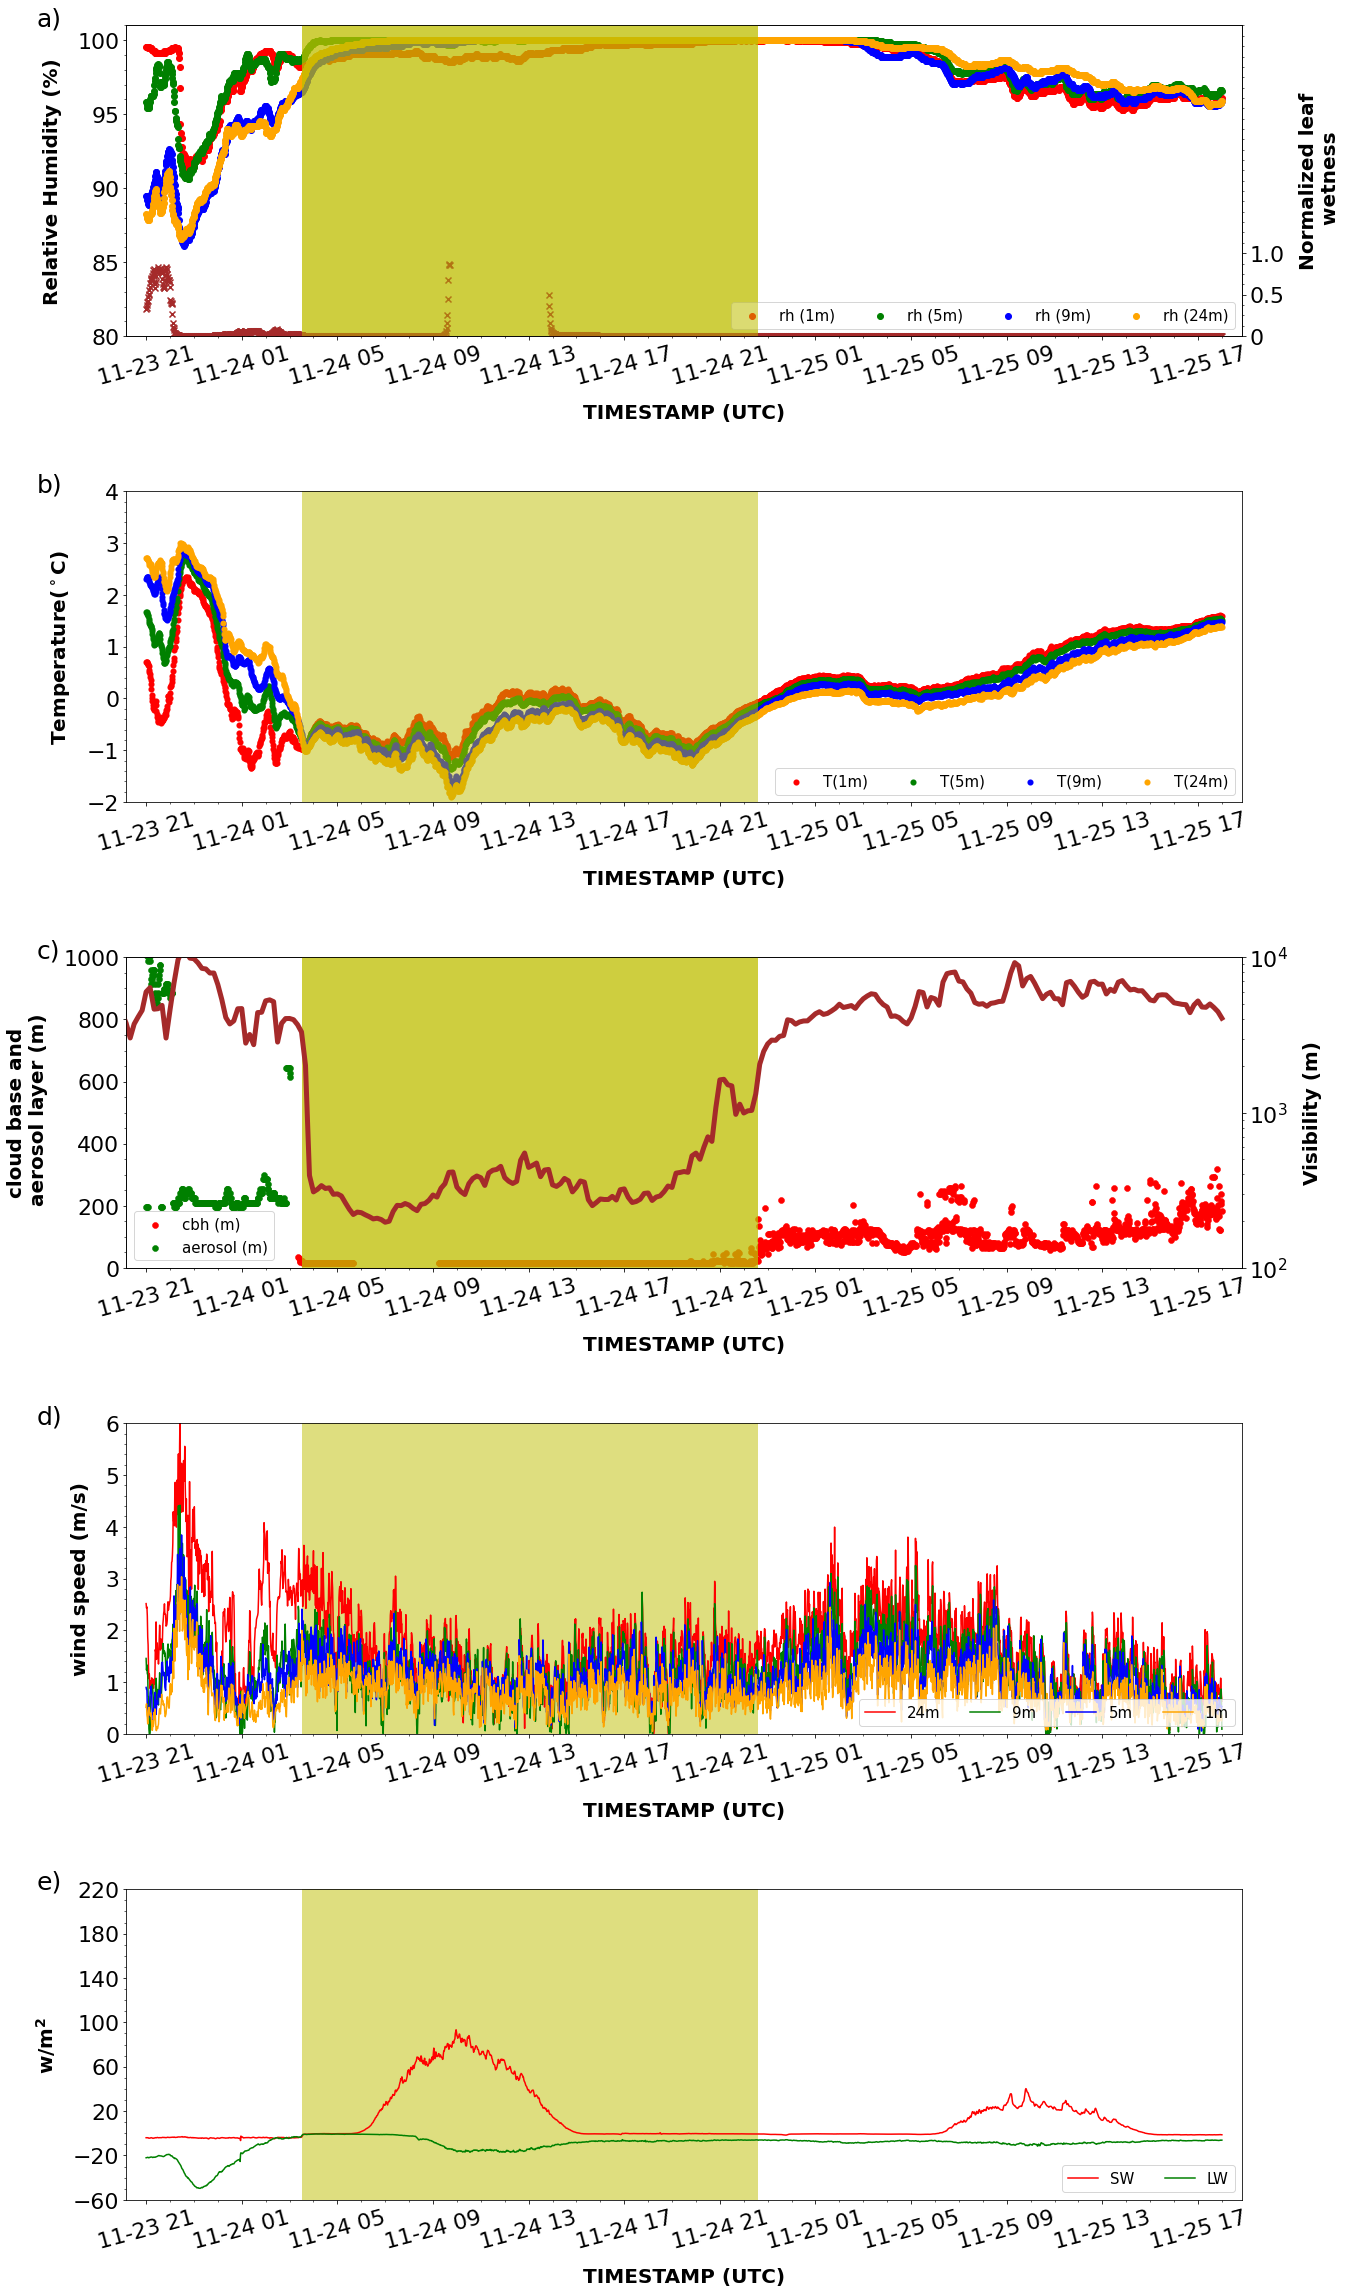

In [131]:
#24 nov fog 
%matplotlib inline
fig, (ax1,ax2,ax3,ax5,ax6) = plt.subplots(5,1,figsize = (20,40),
                                              sharex= False)

ax1.scatter(time1,  n_d['RH_2_corr_cut'][t1:t2], label = 'rh (1m)', color = 'r', marker = 'o')
ax1.scatter(time1,  n_d['RH1_corr_cut'] [t1:t2], label = 'rh (5m)', color = 'g', marker = 'o')
ax1.scatter(time1,  n_d['r_9'] [t1:t2], label = 'rh (9m)', color = 'b',       marker = 'o')
ax1.scatter(time1,  n_d['r_24'][t1:t2], label = 'rh (24m)', color = 'orange',marker = 'o')
ax1.set_ylim([80,101])
ax1.set_yticks(np.arange(80,101,5))
ax1.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax1.set_ylabel('Relative Humidity (%)', fontsize=20, labelpad =15,fontweight = 'bold')

ax7 = ax1.twinx()
ax7.scatter(time1,  lf    , label = 'leaf', color = 'brown', marker = 'x')
ax7.set_ylim([-10,30000])
ax7.set_yticks([0,4000,8000])
ax7.set_yticklabels(["0","0.5","1.0"])
ax7.set_ylabel('Normalized leaf\n wetness', fontsize=20, labelpad =15,fontweight = 'bold')


ax2.scatter(time1,n_d['AirTC_2_Avg'][t1:t2], label = 'T(1m)', color = 'r', linewidth = 0.1)
ax2.scatter(time1,n_d['AirTC_1_Avg'][t1:t2], label = 'T(5m)', color = 'g', linewidth = 0.1)
ax2.scatter(time1,n_d['temp_Avg(1)'][t1:t2], label = 'T(9m)', color = 'b', linewidth = 0.1)
ax2.scatter(time1,n_d['temp_Avg(2)'][t1:t2], label = 'T(24m)', color = 'orange', linewidth = 0.1)
ax2.set_ylim([-2,4.0])
ax2.set_yticks(np.arange(-2,4.1,1.0))
ax2.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax2.set_ylabel('$\mathbf{Temperature(^\circ C)}$', fontsize=20, labelpad =15,fontweight = 'bold' )

ax3.scatter(time1,n_d['cbh_cor'][t1:t2], label = 'cbh (m)', color = 'r', linewidth = 0.5)
ax3.scatter(time1,n_d['pbl_cor'][t1:t2], label = 'aerosol (m)', color = 'g', linewidth = 0.5)
ax3.set_ylim([0,1000])
ax3.set_yticks(np.arange(0,1001,200))
ax3.legend(loc= 'lower left', prop={'size': 15}, ncol = 1)
ax3.set_ylabel('cloud base and\n aerosol layer (m)', fontsize=20, labelpad =15,fontweight = 'bold')

ax8 = ax3.twinx()
ax8.plot(time_1,  df_nd['V'][t_1:t_2], label = 'visibility', color = 'brown', linewidth = 5)
ax8.set_yscale('log')
ax8.set_ylim([0,10**4])
ax8.set_yticks([100,1000,10000])
ax8.set_ylabel('Visibility (m)', fontsize = 20, labelpad=15,fontweight = 'bold')

ax5.plot(time1,n_d['ws_Avg(1)'][t1:t2], label = '24m',color = 'r', linewidth = 1.5)
ax5.plot(time1,n_d['ws_Avg(2)'][t1:t2], label = '9m',color = 'g', linewidth = 1.5)
ax5.plot(time1,n_d['mean_wind_speed']  [t1:t2], label = '5m',color = 'b', linewidth = 1.5)
ax5.plot(time1,n_d['mean_wind_speed_2'][t1:t2], label = '1m',color = 'orange', linewidth = 1.5)
ax5.set_ylim([0,6.0])
ax5.set_yticks(np.arange(0,6.1,1.0))
ax5.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax5.set_ylabel('wind speed (m/s)', fontsize=20, labelpad =15,fontweight = 'bold')

ax6.plot(time1,n_d['sw'][t1:t2], label = 'SW',color = 'r', linewidth = 1.5)
ax6.plot(time1,n_d['lw'][t1:t2], label = 'LW',color = 'g', linewidth = 1.5)
ax6.set_ylim([-60,220])
ax6.set_yticks(np.arange(-60,221,40))
ax6.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax6.set_ylabel('$\mathbf{w/m^2}$', fontsize=20, labelpad =15)

plt.subplots_adjust(hspace = 0.5)

for axi in (ax1,ax2,ax3,ax5,ax6,ax7,ax8):
    axi.axvspan(a, b1, color='y', alpha=0.5, lw=0)
    axi.set_xlabel('TIMESTAMP (UTC)',fontsize= 20, labelpad = 15,fontweight = 'bold')
    axi.minorticks_on()
    axi.set_xbound(n_d['TIMESTAMP_UTC'][t1-50], n_d['TIMESTAMP_UTC'][t2+50])
    axi.xaxis.set_major_formatter(DateFormatter("%m-%d %H"))
    axi.tick_params(axis='both', which='major', labelsize=22)
    axi.tick_params(axis='both', which='minor', labelsize=10)
    axi.tick_params(axis='x', labelrotation= 15)
    axi.xaxis.set_major_locator(HourLocator(interval= 4))

b= ['a)', 'b)', 'c)', 'd)', 'e)']
for axi, j in zip ((ax1,ax2,ax3,ax5,ax6,ax7,ax8),b):
    axi.annotate(j, xy=(-0.08,1), xycoords="axes fraction", fontsize = 25)
#plt.tick_params(axis='x', labelrotation= 15)
#fig.autofmt_xdate(rotation=15)

#plt.xlabel('TIMESTAMP_UTC', fontsize= 20, labelpad = 15)


/var/folders/lj/42kjq4jj2lj80_y4pkyqbcwh0000gn/T/ipykernel_2208/3565715734.py:40: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax8.set_ylim([0,10**4])


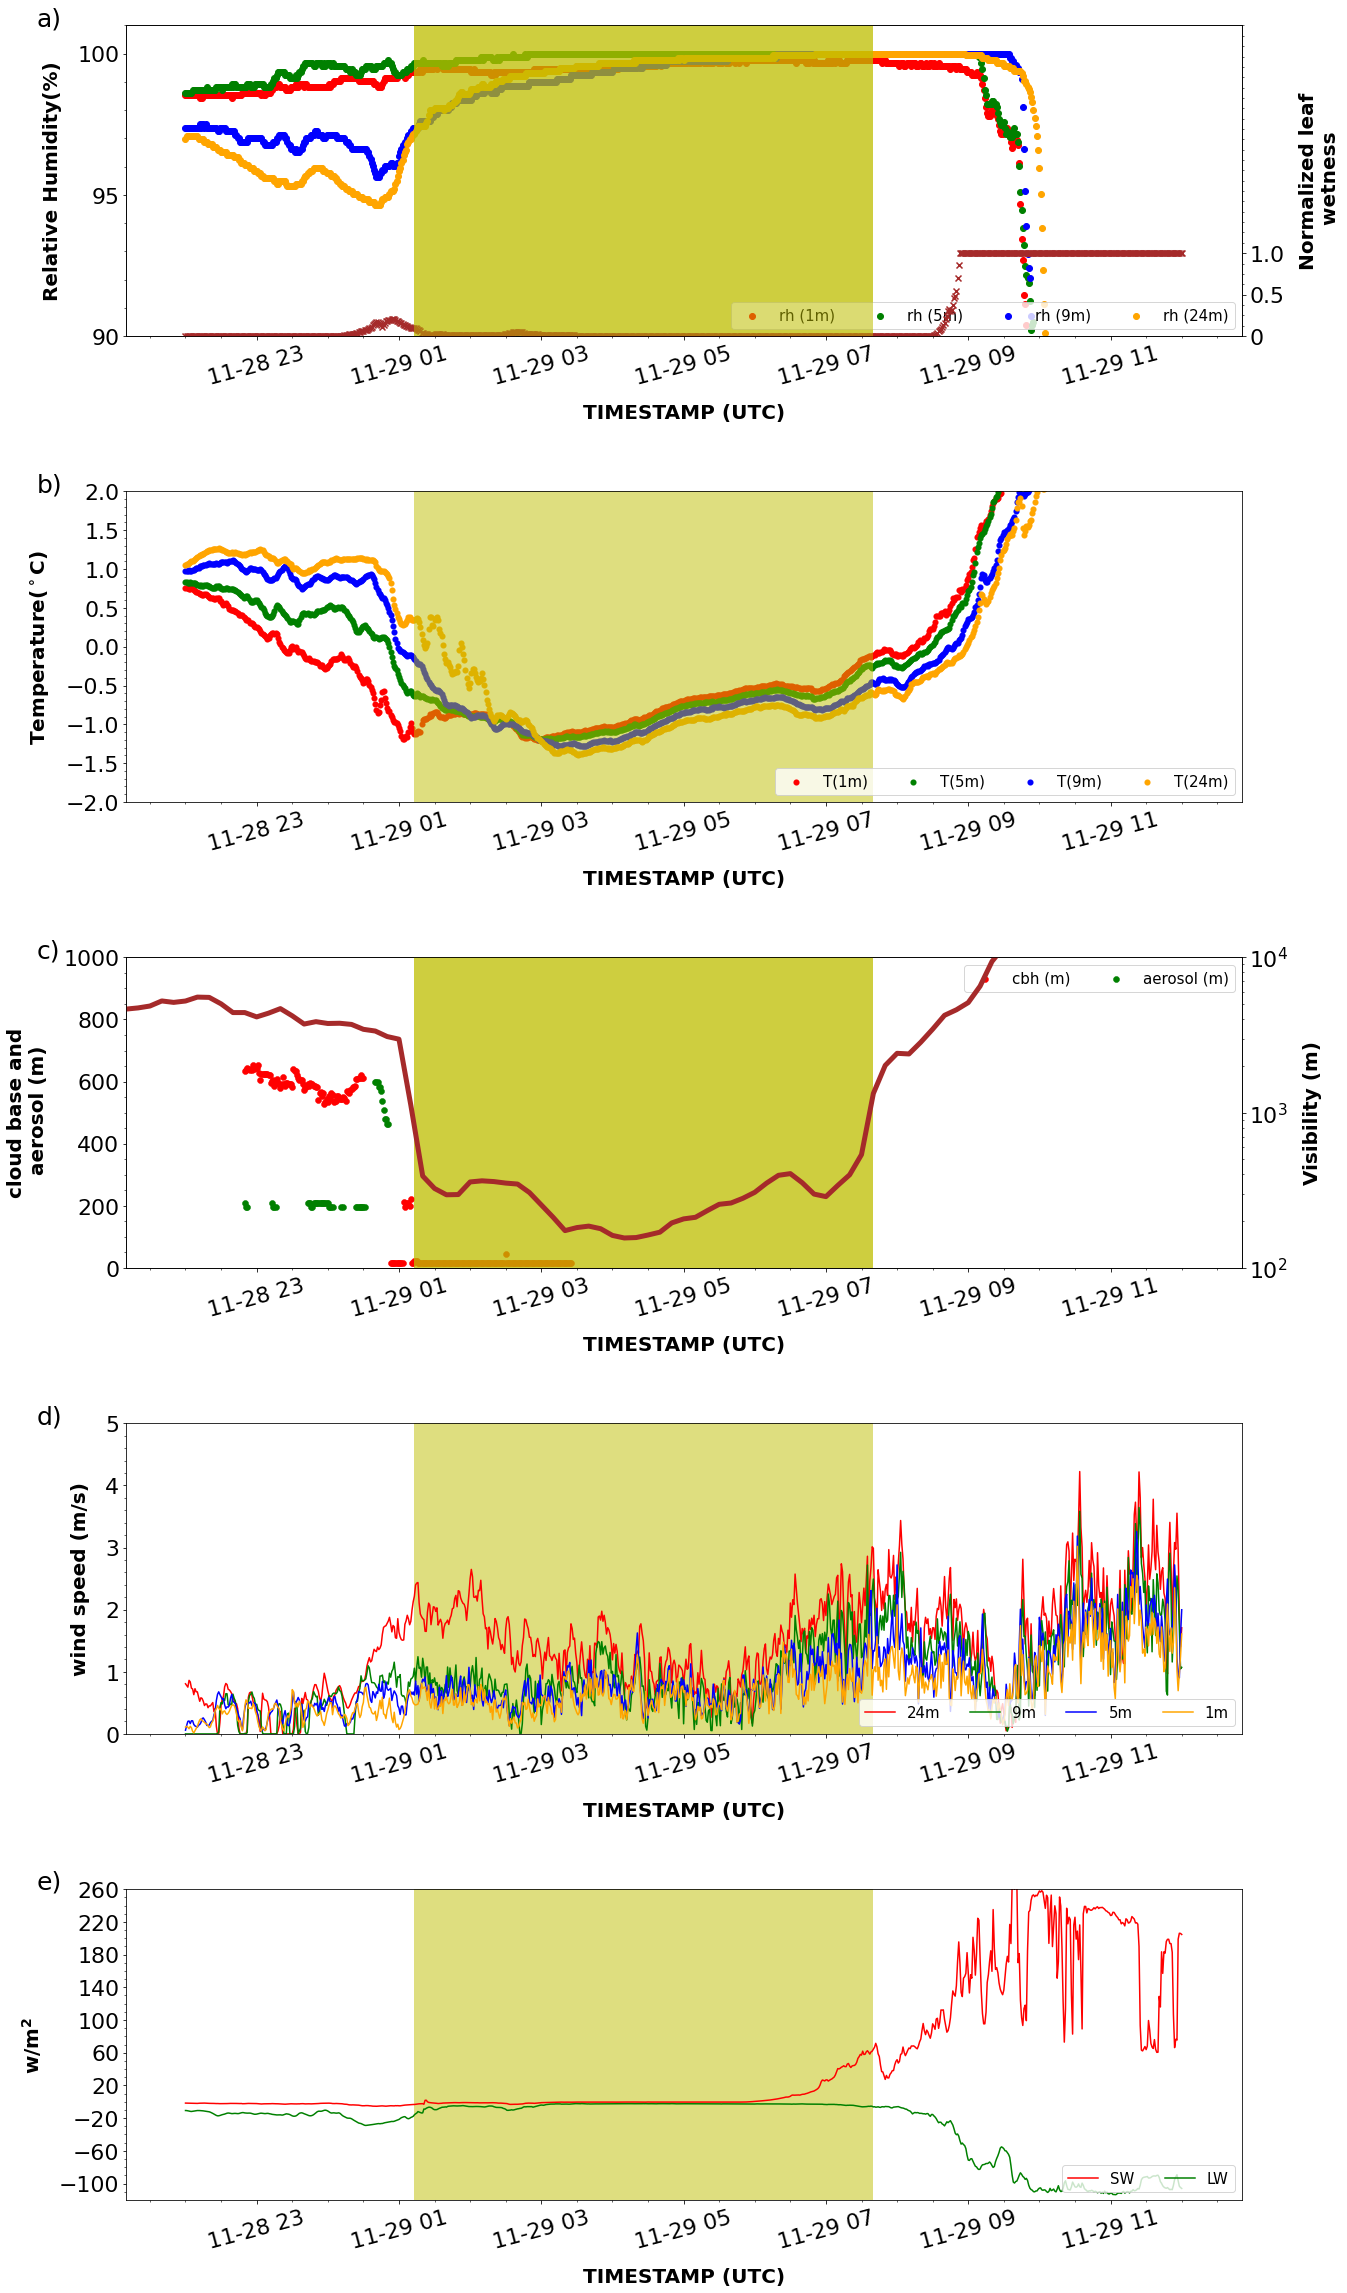

In [132]:
#29 november 2020 fog
%matplotlib inline
fig, (ax1,ax2,ax3,ax5,ax6) = plt.subplots(5,1,figsize = (20,40),sharex= False)

ax1.scatter(time2,  n_d['RH_2_corr_cut'][t3:t4], label = 'rh (1m)', color = 'r', marker = 'o')
ax1.scatter(time2,  n_d['RH1_corr_cut'] [t3:t4], label = 'rh (5m)', color = 'g', marker = 'o')
ax1.scatter(time2,  n_d['r_9'] [t3:t4], label = 'rh (9m)', color = 'b',       marker = 'o')
ax1.scatter(time2,  n_d['r_24'][t3:t4], label = 'rh (24m)', color = 'orange',marker = 'o')
ax1.set_ylim([90,101])
ax1.set_yticks(np.arange(90,101,5))
ax1.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax1.set_ylabel('Relative Humidity(%)', fontsize=20, labelpad =15,fontweight = 'bold')

ax7 = ax1.twinx()
ax7.scatter(time2,n_d['kohms_Avg'][t3:t4], label = 'leaf', color = 'brown', marker = 'x')
ax7.set_ylim([-10,30000])
ax7.set_yticks([0,4000,8000])
ax7.set_yticklabels(["0","0.5","1.0"])
ax7.set_ylabel('Normalized leaf\n wetness', fontsize=20, labelpad =15,fontweight='bold')

ax2.scatter(time2,n_d['AirTC_2_Avg'][t3:t4], label = 'T(1m)', color = 'r', linewidth = 0.1)
ax2.scatter(time2,n_d['AirTC_1_Avg'][t3:t4], label = 'T(5m)', color = 'g', linewidth = 0.1)
ax2.scatter(time2,n_d['temp_Avg(1)'][t3:t4], label = 'T(9m)', color = 'b', linewidth = 0.1)
ax2.scatter(time2,n_d['temp_Avg(2)'][t3:t4], label = 'T(24m)', color = 'orange', linewidth = 0.1)
ax2.set_ylim([-2,2])
ax2.set_yticks(np.arange(-2,2.1,0.5))
ax2.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax2.set_ylabel('$\mathbf{Temperature(^\circ C)}$', fontsize=20, labelpad =15)

ax3.scatter(time2,n_d['cbh_cor'][t3:t4], label = 'cbh (m)', color = 'r', linewidth = 0.5)
ax3.scatter(time2,n_d['pbl_cor'][t3:t4], label = 'aerosol (m)', color = 'g', linewidth = 0.5)
ax3.set_ylim([0,1000])
ax3.set_yticks(np.arange(0,1001,200))
ax3.legend(loc= 'upper right', prop={'size': 15}, ncol = 5)
ax3.set_ylabel('cloud base and\n aerosol (m)', fontsize=20, labelpad =15,fontweight='bold')

ax8 = ax3.twinx()
ax8.plot(time_2,  df_nd['V'][t_3:t_4], label = 'visibility', color = 'brown', linewidth = 5)
ax8.set_yscale('log')
ax8.set_ylim([0,10**4])
ax8.set_yticks([100,1000,10000])
ax8.set_ylabel('Visibility (m)', fontsize = 20, labelpad=15,fontweight = 'bold')

ax5.plot(time2,n_d['ws_Avg(1)'][t3:t4], label = '24m',color = 'r', linewidth = 1.5)
ax5.plot(time2,n_d['ws_Avg(2)'][t3:t4], label = '9m',color = 'g', linewidth = 1.5)
ax5.plot(time2,n_d['mean_wind_speed']  [t3:t4], label = '5m',color = 'b', linewidth = 1.5)
ax5.plot(time2,n_d['mean_wind_speed_2'][t3:t4], label = '1m',color = 'orange', linewidth = 1.5)
ax5.set_ylim([0,5.0])
ax5.set_yticks(np.arange(0,5.1,1.0))
ax5.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax5.set_ylabel('wind speed (m/s)', fontsize=20, labelpad =15,fontweight='bold')

ax6.plot(time2,n_d['sw'][t3:t4], label = 'SW',color = 'r', linewidth = 1.5)
ax6.plot(time2,n_d['lw'][t3:t4], label = 'LW',color = 'g', linewidth = 1.5)
ax6.set_ylim([-120,260])
ax6.set_yticks(np.arange(-100,261,40))
ax6.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax6.set_ylabel('$\mathbf{w/m^2}$', fontsize=20, labelpad =15)
ax6.set_xlabel('TIMESTAMP_UTC', fontsize= 20, labelpad = 15,fontweight = 'bold')

plt.subplots_adjust(hspace = 0.5)

for axi in (ax1,ax2,ax3,ax5,ax6,ax7,ax8):
    axi.axvspan(a2, b2, color='y', alpha=0.5, lw=0)
    axi.minorticks_on()
    axi.set_xbound(n_d['TIMESTAMP_UTC'][t3-50], n_d['TIMESTAMP_UTC'][t4+50])
    axi.xaxis.set_major_formatter(DateFormatter("%m-%d %H"))
    axi.tick_params(axis='both', which='major', labelsize=22)
    axi.tick_params(axis='both', which='minor', labelsize=10)
    axi.tick_params(axis='x', labelrotation= 15)
    axi.xaxis.set_major_locator(HourLocator(interval= 2))
    axi.set_xlabel('TIMESTAMP (UTC)',fontsize= 20, labelpad = 15,fontweight = 'bold')
    
b= ['a)', 'b)', 'c)', 'd)', 'e)']
for axi, j in zip ((ax1,ax2,ax3,ax5,ax6,ax7,ax8),b):
    axi.annotate(j, xy=(-0.08,1), xycoords="axes fraction", fontsize = 25)
#plt.xlabel('TIMESTAMP_UTC', fontsize= 20, labelpad = 15)
#plt.tick_params(axis='x', labelrotation= 20)

In [133]:
#max(n_d['RH_1_corr'])

In [134]:
#foggy periods of jan and feb in consideration
#foggy period of jan 12
##no adding 240 minutes 
t7 = 15840
t8 = 16501
time4 = j_m['TIMESTAMP_UTC'][t7:t8]

y1 = j_m['TIMESTAMP_UTC'][16098]
y2 = j_m['TIMESTAMP_UTC'][16098+200]

#longest foggy periods of feb 02
t9 = 46800
t10 = 48541
time5 = j_m['TIMESTAMP_UTC'][t9:t10]
y3 = j_m['TIMESTAMP_UTC'][47096]
y4 = j_m['TIMESTAMP_UTC'][47096+1024]


#foggy period of feb 20
t11 = 71580
t12 = 73021
time6 = j_m['TIMESTAMP_UTC'][t11:t12]
y5 = j_m['TIMESTAMP_UTC'][72230]
y6 = j_m['TIMESTAMP_UTC'][72230+240]

#print(time4,time5,time6,y3,y4)
time6

71580   2021-02-19 17:00:00
71581   2021-02-19 17:01:00
71582   2021-02-19 17:02:00
71583   2021-02-19 17:03:00
71584   2021-02-19 17:04:00
                ...        
73016   2021-02-20 16:56:00
73017   2021-02-20 16:57:00
73018   2021-02-20 16:58:00
73019   2021-02-20 16:59:00
73020   2021-02-20 17:00:00
Name: TIMESTAMP_UTC, Length: 1441, dtype: datetime64[ns]

/var/folders/lj/42kjq4jj2lj80_y4pkyqbcwh0000gn/T/ipykernel_2208/861021348.py:40: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax8.set_ylim([0,10**4])


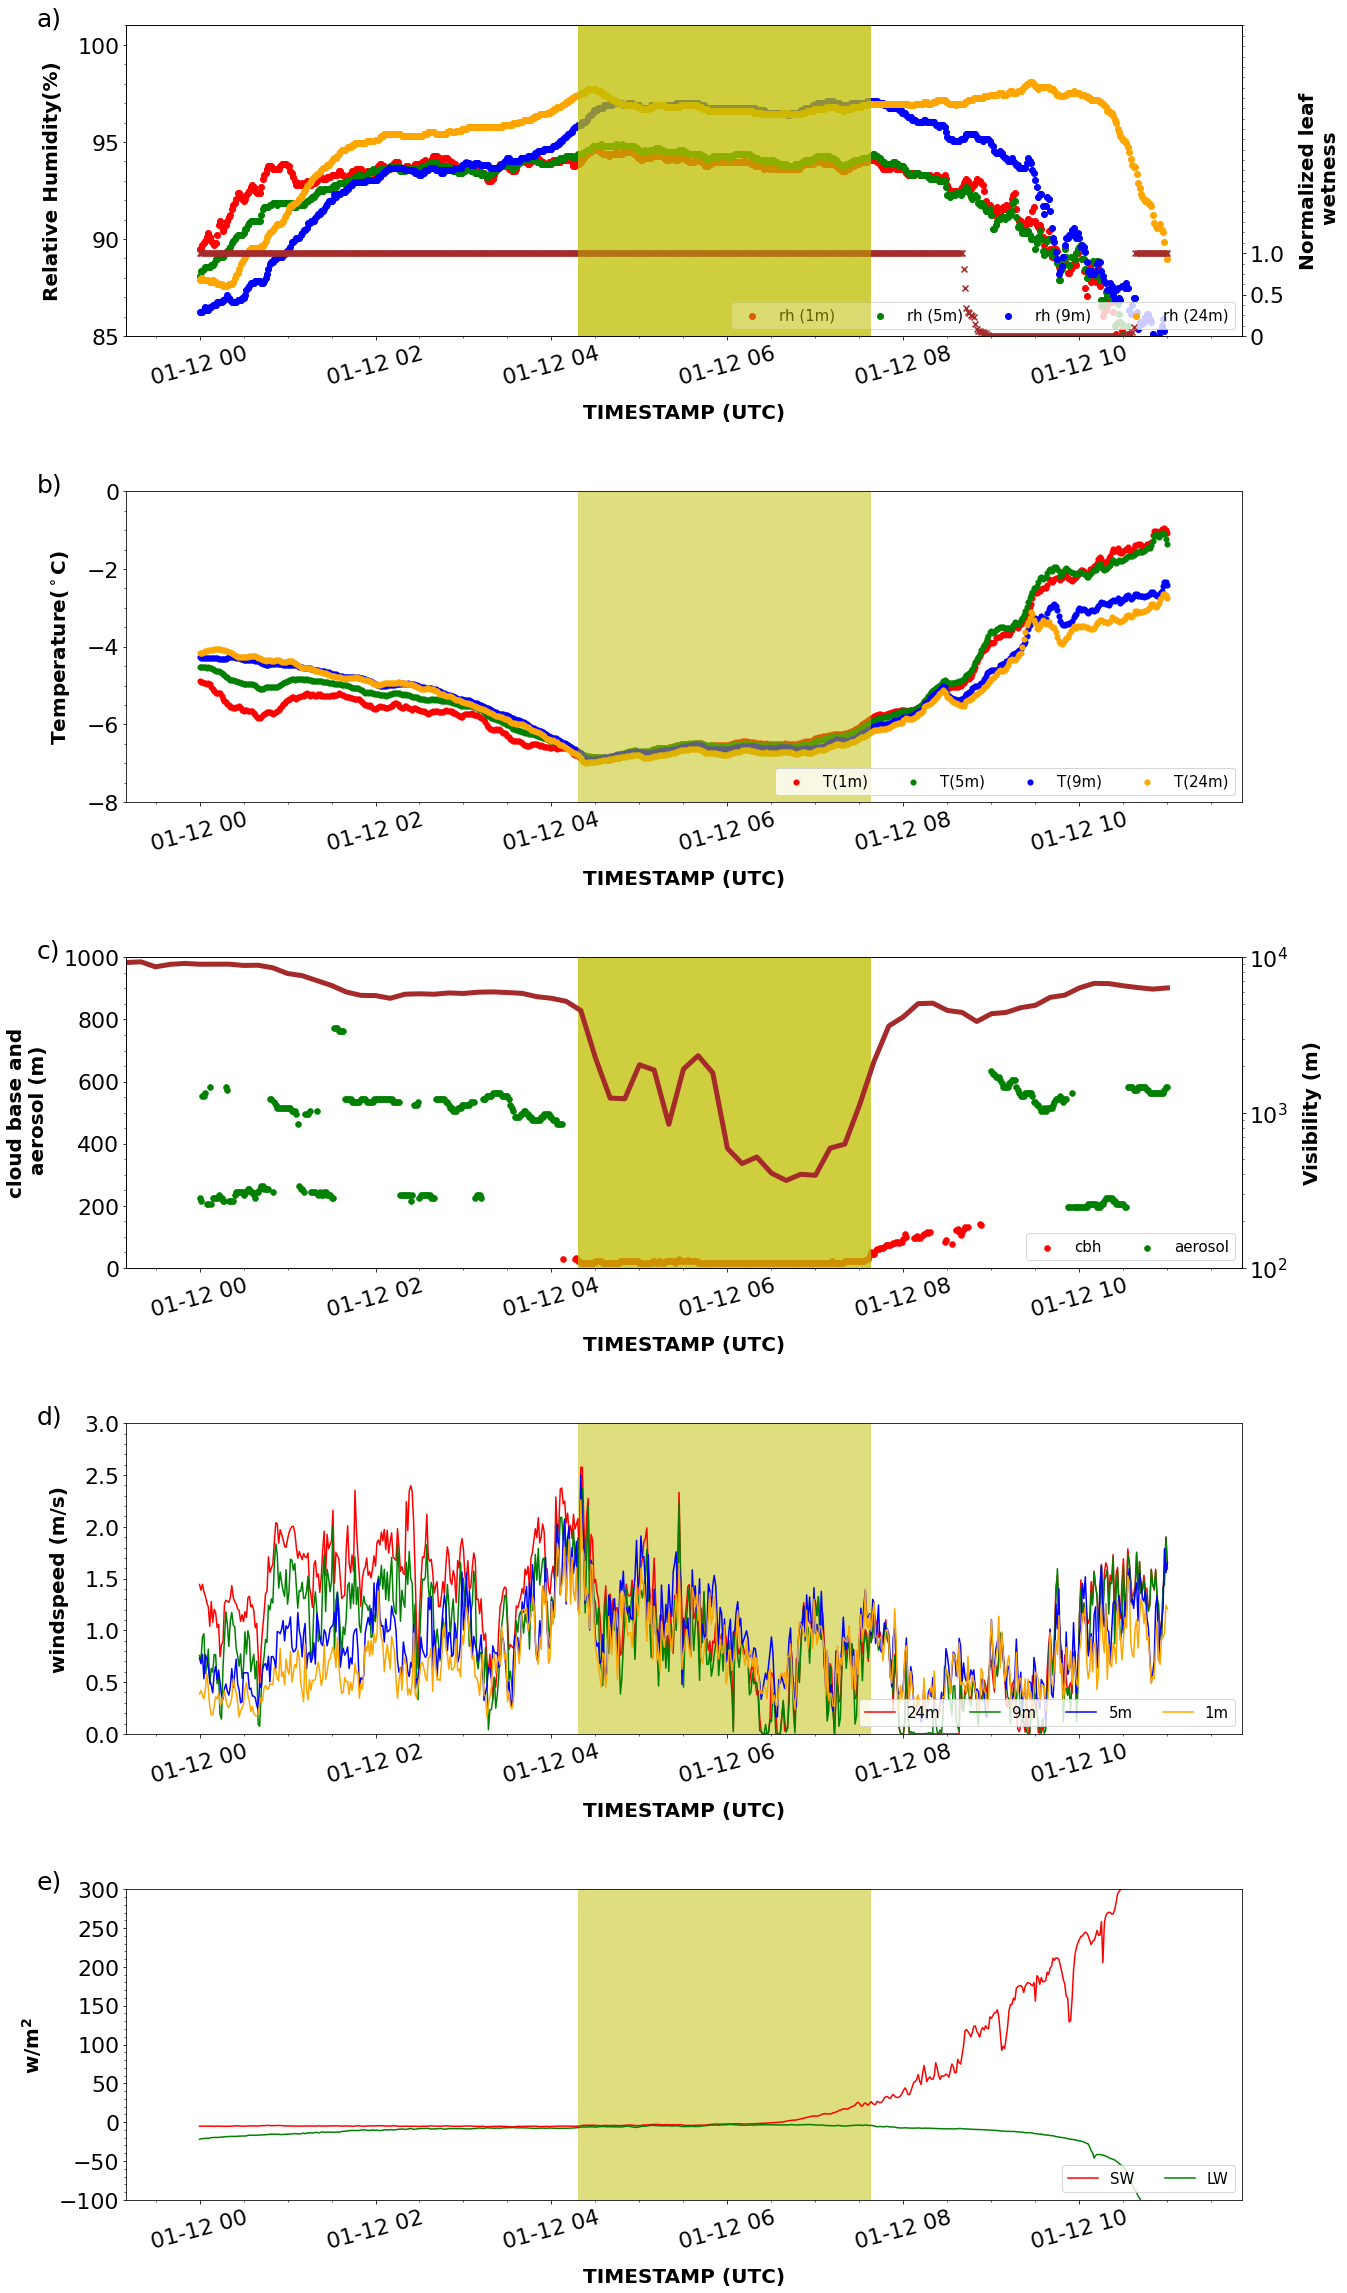

In [135]:
#12 jan foggy periods
%matplotlib inline
fig, (ax1,ax2,ax3,ax5,ax6) = plt.subplots(5,1,figsize = (20,40),sharex= False)

ax1.scatter(time4, j_m['RH_2_corr_cut'][t7:t8], label = 'rh (1m)', color = 'r', marker = 'o')
ax1.scatter(time4, j_m['RH1_corr_cut'] [t7:t8], label = 'rh (5m)', color = 'g', marker = 'o')
ax1.scatter(time4, j_m['r_9'] [t7:t8], label = 'rh (9m)', color = 'b',       marker = 'o')
ax1.scatter(time4, j_m['r_24'][t7:t8], label = 'rh (24m)', color = 'orange',marker = 'o')
ax1.set_ylim([85,101])
ax1.set_yticks(np.arange(85,101,5))
ax1.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax1.set_ylabel('Relative Humidity(%)', fontsize=20, labelpad =15,fontweight = 'bold')

ax7 = ax1.twinx()
ax7.scatter(time4,j_m['kohms_Avg'][t7:t8], label = 'leaf\n wetness', color = 'brown', marker = 'x')
ax7.set_ylim([-10,30000])
ax7.set_yticks([0,4000,8000])
ax7.set_yticklabels(["0","0.5","1.0"])
ax7.set_ylabel('Normalized leaf\n wetness', fontsize=20, labelpad =15,fontweight= 'bold')

ax2.scatter(time4,j_m['AirTC_2_Avg'][t7:t8], label = 'T(1m)', color = 'r', linewidth = 0.1)
ax2.scatter(time4,j_m['AirTC_1_Avg'][t7:t8], label = 'T(5m)', color = 'g', linewidth = 0.1)
ax2.scatter(time4,j_m['temp_Avg(1)'][t7:t8], label = 'T(9m)', color = 'b', linewidth = 0.1)
ax2.scatter(time4,j_m['temp_Avg(2)'][t7:t8], label = 'T(24m)', color = 'orange', linewidth = 0.1)
ax2.set_ylim([-8,0])
ax2.set_yticks(np.arange(-8,0.1,2.))
ax2.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax2.set_ylabel('$\mathbf{Temperature (^\circ C)}$', fontsize=20, labelpad =15)

ax3.scatter(time4,j_m['cbh_cor'][t7:t8], label = 'cbh', color = 'r', linewidth = 0.5)
ax3.scatter(time4,j_m['pbl_cor'][t7:t8], label = 'aerosol', color = 'g', linewidth = 0.5)
ax3.set_ylim([0,1000])
ax3.set_yticks(np.arange(0,1001,200))
ax3.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax3.set_ylabel('cloud base and\n aerosol (m)', fontsize=20, labelpad =15,fontweight='bold')

ax8 = ax3.twinx()
ax8.plot(time_4,  df_jm['V'][t_7:t_8], label = 'visibility', color = 'brown',linewidth = 5)
ax8.set_yscale('log')
ax8.set_ylim([0,10**4])
ax8.set_yticks([100,1000,10000])
ax8.set_ylabel('Visibility (m)', fontsize = 20, labelpad=15,fontweight = 'bold')

ax5.plot(time4,j_m['ws_Avg(1)'][t7:t8], label = '24m',color = 'r', linewidth = 1.5)
ax5.plot(time4,j_m['ws_Avg(2)'][t7:t8], label = '9m',color = 'g', linewidth = 1.5)
ax5.plot(time4,j_m['mean_wind_speed']  [t7:t8], label = '5m',color = 'b', linewidth = 1.5)
ax5.plot(time4,j_m['mean_wind_speed_2'][t7:t8], label = '1m',color = 'orange', linewidth = 1.5)
ax5.set_ylim([0,3])
ax5.set_yticks(np.arange(0,3.1,0.5))
ax5.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax5.set_ylabel('windspeed (m/s)', fontsize=20, labelpad =15,fontweight = 'bold')

ax6.plot(time4,j_m['sw'][t7:t8], label = 'SW',color = 'r', linewidth = 1.5)
ax6.plot(time4,j_m['lw'][t7:t8], label = 'LW',color = 'g', linewidth = 1.5)
ax6.set_ylim([-100,300])
ax6.set_yticks(np.arange(-100,301,50))
ax6.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax6.set_ylabel('$\mathbf{w/m^2}$', fontsize=20, labelpad =15,fontweight = 'bold')
ax6.set_xlabel('TIMESTAMP_UTC', fontsize= 20, labelpad = 15,fontweight = 'bold')

plt.subplots_adjust(hspace = 0.5)

for axi in (ax1,ax2,ax3,ax5,ax6,ax7,ax8):
    axi.axvspan(y1, y2, color='y', alpha=0.5, lw=0)
    axi.minorticks_on()
    axi.set_xbound(j_m['TIMESTAMP_UTC'][t7-50], j_m['TIMESTAMP_UTC'][t8+50])
    axi.xaxis.set_major_formatter(DateFormatter("%m-%d %H"))
    axi.tick_params(axis='both', which='major', labelsize=22)
    axi.tick_params(axis='both', which='minor', labelsize=10)
    axi.tick_params(axis='x', labelrotation= 15)
    axi.xaxis.set_major_locator(HourLocator(interval= 2))
    axi.set_xlabel('TIMESTAMP (UTC)',fontsize= 20, labelpad = 15,fontweight = 'bold')
    
b= ['a)', 'b)', 'c)', 'd)', 'e)']
for axi, j in zip ((ax1,ax2,ax3,ax5,ax6,ax7,ax8),b):
    axi.annotate(j, xy=(-0.08,1), xycoords="axes fraction", fontsize = 25)

/var/folders/lj/42kjq4jj2lj80_y4pkyqbcwh0000gn/T/ipykernel_2208/3334902651.py:40: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax8.set_ylim([0,10**4])


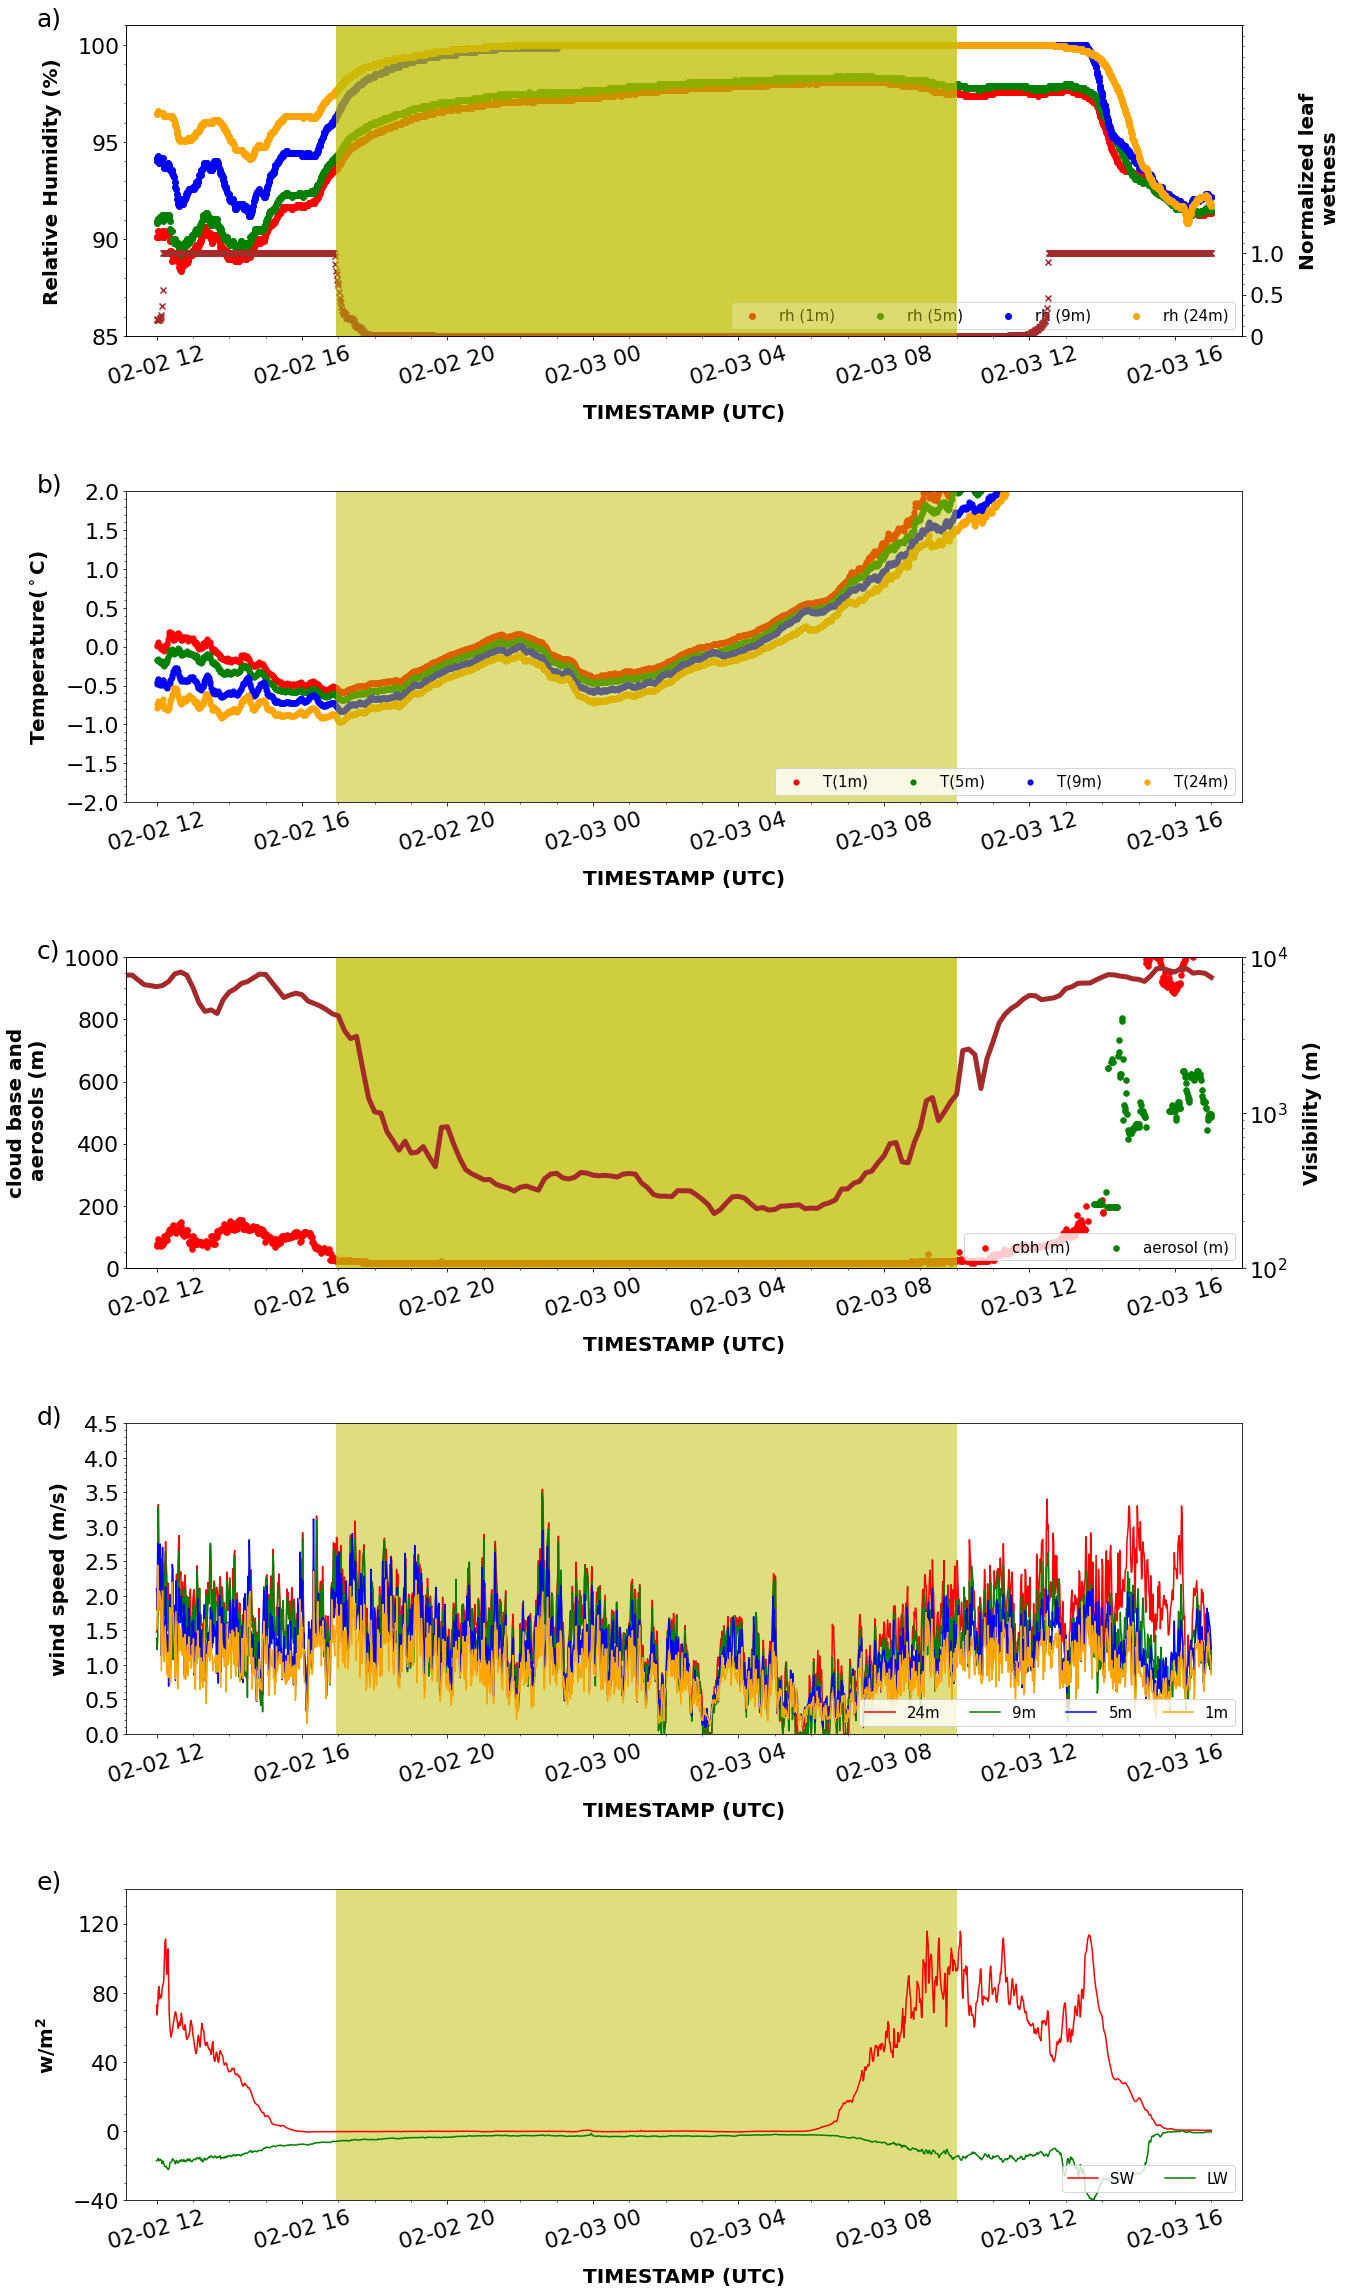

In [136]:
# 2 feb foggy period
%matplotlib inline
fig, (ax1,ax2,ax3,ax5,ax6) = plt.subplots(5,1,figsize = (20,40),sharex= False)

ax1.scatter(time5, j_m['RH_2_corr_cut'][t9:t10], label = 'rh (1m)', color = 'r', marker = 'o')
ax1.scatter(time5, j_m['RH1_corr_cut'] [t9:t10], label = 'rh (5m)', color = 'g', marker = 'o')
ax1.scatter(time5, j_m['r_9'] [t9:t10], label = 'rh (9m)', color = 'b',       marker = 'o')
ax1.scatter(time5, j_m['r_24'][t9:t10], label = 'rh (24m)', color = 'orange',marker = 'o')
ax1.set_ylim([85,101])
ax1.set_yticks(np.arange(85,101,5))
ax1.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax1.set_ylabel('Relative Humidity (%)', fontsize=20, labelpad =15,fontweight = 'bold')

ax7 = ax1.twinx()
ax7.scatter(time5,j_m['kohms_Avg'][t9:t10], label = 'leaf\n wetness', color = 'brown', marker = 'x')
ax7.set_ylim([-10,30000])
ax7.set_yticks([0,4000,8000])
ax7.set_yticklabels(["0","0.5","1.0"])
ax7.set_ylabel('Normalized leaf\n wetness', fontsize=20, labelpad =15,fontweight = 'bold')

ax2.scatter(time5,j_m['AirTC_2_Avg'][t9:t10], label = 'T(1m)', color = 'r', linewidth = 0.1)
ax2.scatter(time5,j_m['AirTC_1_Avg'][t9:t10], label = 'T(5m)', color = 'g', linewidth = 0.1)
ax2.scatter(time5,j_m['temp_Avg(1)'][t9:t10], label = 'T(9m)', color = 'b', linewidth = 0.1)
ax2.scatter(time5,j_m['temp_Avg(2)'][t9:t10], label = 'T(24m)', color = 'orange', linewidth = 0.1)
ax2.set_ylim([-2,2])
ax2.set_yticks(np.arange(-2,2.1,0.5))
ax2.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax2.set_ylabel('$\mathbf{Temperature (^\circ C)}$', fontsize=20, labelpad =15 )

ax3.scatter(time5,j_m['cbh_cor'][t9:t10], label = 'cbh (m)', color = 'r', linewidth = 0.5)
ax3.scatter(time5,j_m['pbl_cor'][t9:t10], label = 'aerosol (m)', color = 'g', linewidth = 0.5)
ax3.set_ylim([0,1000])
ax3.set_yticks(np.arange(0,1001,200))
ax3.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax3.set_ylabel('cloud base and\n aerosols (m)', fontsize=20, labelpad =15,fontweight = 'bold')

ax8 = ax3.twinx()
ax8.plot(time_5,  df_jm['V'][t_9:t_10], label = 'visibility', color = 'brown',linewidth = 5)
ax8.set_yscale('log')
ax8.set_ylim([0,10**4])
ax8.set_yticks([100,1000,10000])
ax8.set_ylabel('Visibility (m)', fontsize = 20, labelpad=15,fontweight='bold')

ax5.plot(time5,j_m['ws_Avg(1)'][t9:t10], label = '24m',color = 'r', linewidth = 1.5)
ax5.plot(time5,j_m['ws_Avg(2)'][t9:t10], label = '9m',color = 'g', linewidth = 1.5)
ax5.plot(time5,j_m['mean_wind_speed']  [t9:t10], label = '5m',color = 'b', linewidth = 1.5)
ax5.plot(time5,j_m['mean_wind_speed_2'][t9:t10], label = '1m',color = 'orange', linewidth = 1.5)
ax5.set_ylim([0,4.5])
ax5.set_yticks(np.arange(0,4.6,0.5))
ax5.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax5.set_ylabel('wind speed (m/s)', fontsize=20, labelpad =15,fontweight='bold')


ax6.plot(time5,j_m['sw'][t9:t10], label = 'SW',color = 'r', linewidth = 1.5)
ax6.plot(time5,j_m['lw'][t9:t10], label = 'LW',color = 'g', linewidth = 1.5)
ax6.set_ylim([-40,140])
ax6.set_yticks(np.arange(-40,141,40))
ax6.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax6.set_ylabel('$\mathbf{w/m^2}$', fontsize=20, labelpad =15 )
ax6.set_xlabel('TIMESTAMP_UTC', fontsize= 20, labelpad = 15,fontweight = 'bold')

plt.subplots_adjust(hspace = 0.5)


for axi in (ax1,ax2,ax3,ax5,ax6,ax7,ax8):
    axi.axvspan(y3, y4, color='y', alpha=0.5, lw=0)
    axi.minorticks_on()
    axi.set_xbound(j_m['TIMESTAMP_UTC'][t9-50], j_m['TIMESTAMP_UTC'][t10+50])
    axi.xaxis.set_major_formatter(DateFormatter("%m-%d %H"))
    axi.tick_params(axis='both', which='major', labelsize=22)
    axi.tick_params(axis='both', which='minor', labelsize=10)
    axi.tick_params(axis='x', labelrotation= 15)
    axi.xaxis.set_major_locator(HourLocator(interval= 4))
    axi.set_xlabel('TIMESTAMP (UTC)',fontsize= 20, labelpad = 15,fontweight = 'bold')
    
b= ['a)', 'b)', 'c)', 'd)', 'e)']
for axi, j in zip ((ax1,ax2,ax3,ax5,ax6,ax7,ax8),b):
    axi.annotate(j, xy=(-0.08,1), xycoords="axes fraction", fontsize = 25)

#plt.xlabel('TIMESTAMP_UTC', fontsize= 20, labelpad = 15)
#plt.tick_params(axis='x', labelrotation= 20)

/var/folders/lj/42kjq4jj2lj80_y4pkyqbcwh0000gn/T/ipykernel_2208/1321941733.py:40: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax8.set_ylim([0,10**4])


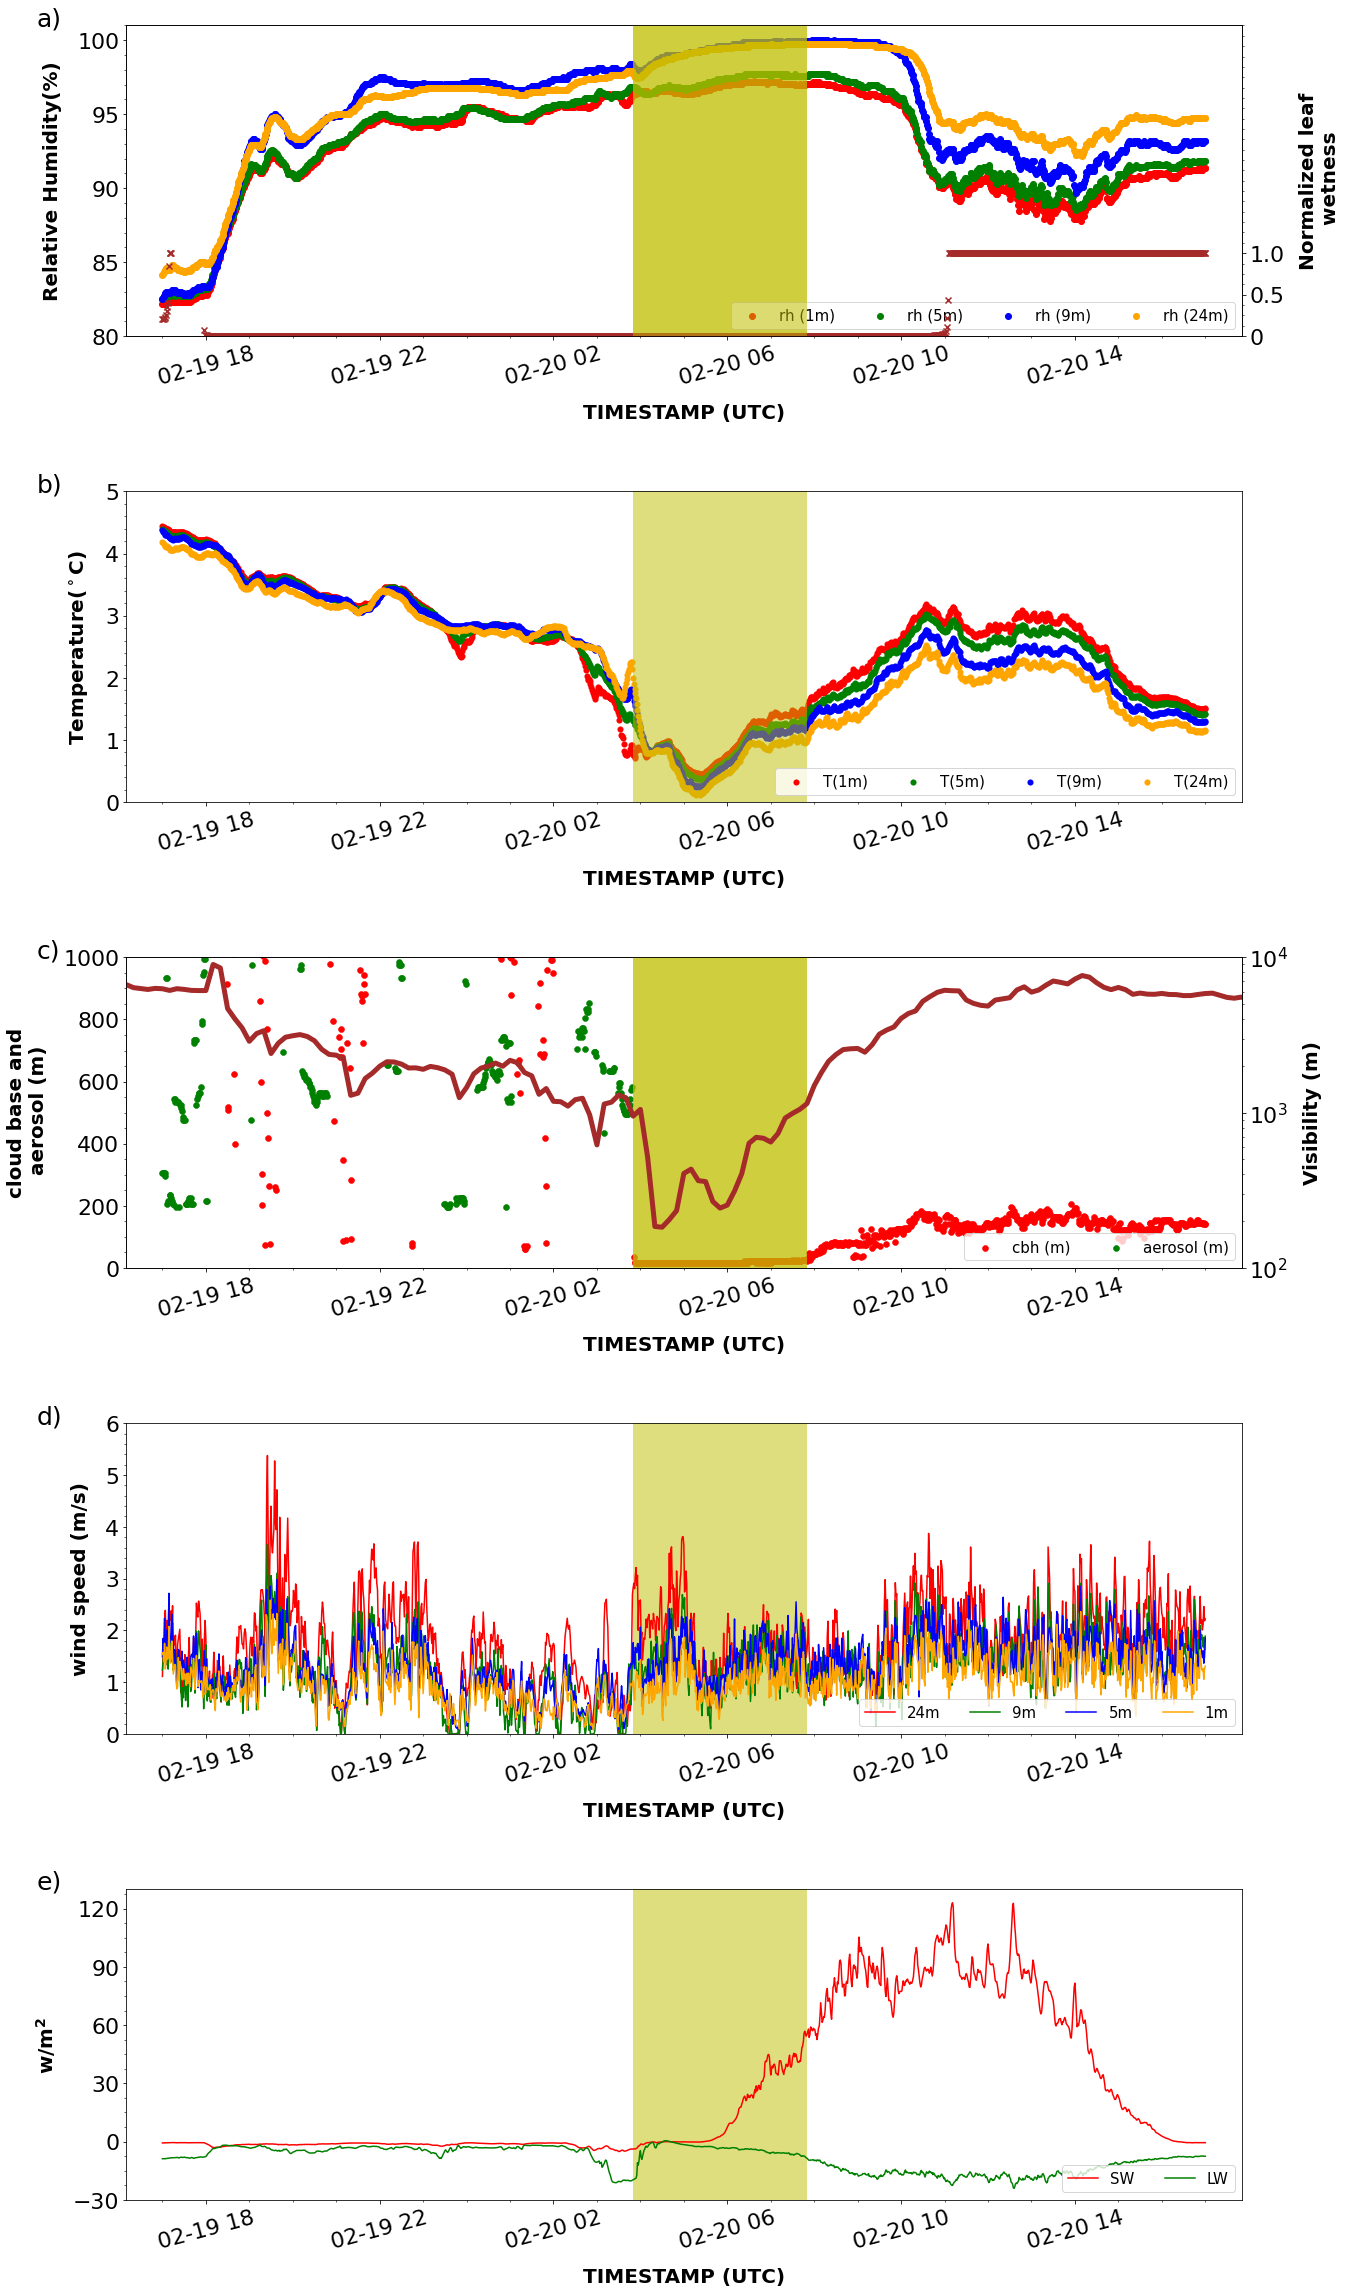

In [137]:
#20 feb fog
%matplotlib inline
fig, (ax1,ax2,ax3,ax5,ax6) = plt.subplots(5,1,figsize = (20,40),sharex= False)

ax1.scatter(time6, j_m['RH_2_corr_cut'][t11:t12], label = 'rh (1m)', color = 'r', marker = 'o')
ax1.scatter(time6, j_m['RH1_corr_cut'] [t11:t12], label = 'rh (5m)', color = 'g', marker = 'o')
ax1.scatter(time6, j_m['r_9'] [t11:t12], label = 'rh (9m)', color = 'b',       marker = 'o')
ax1.scatter(time6, j_m['r_24'][t11:t12], label = 'rh (24m)', color = 'orange',marker = 'o')
ax1.set_ylim([80,101])
ax1.set_yticks(np.arange(80,101,5))
ax1.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax1.set_ylabel('Relative Humidity(%)', fontsize=20, labelpad =15,fontweight = 'bold')

ax7 = ax1.twinx()
ax7.scatter(time6,j_m['kohms_Avg'][t11:t12], label = 'leaf\n wetness', color = 'brown', marker = 'x')
ax7.set_ylim([-10,30000])
ax7.set_yticks([0,4000,8000])
ax7.set_yticklabels(["0","0.5","1.0"])
ax7.set_ylabel('Normalized leaf\n wetness', fontsize=20, labelpad =15, fontweight='bold')

ax2.scatter(time6,j_m['AirTC_2_Avg'][t11:t12], label = 'T(1m)', color = 'r', linewidth = 0.1)
ax2.scatter(time6,j_m['AirTC_1_Avg'][t11:t12], label = 'T(5m)', color = 'g', linewidth = 0.1)
ax2.scatter(time6,j_m['temp_Avg(1)'][t11:t12], label = 'T(9m)', color = 'b', linewidth = 0.1)
ax2.scatter(time6,j_m['temp_Avg(2)'][t11:t12], label = 'T(24m)', color = 'orange', linewidth = 0.1)
ax2.set_ylim([0.,5])
ax2.set_yticks(np.arange(0.,5.1,1.))
ax2.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax2.set_ylabel('$\mathbf{Temperature (^\circ C)}$', fontsize=20, labelpad =15)

ax3.scatter(time6,j_m['cbh_cor'][t11:t12], label = 'cbh (m)', color = 'r', linewidth = 0.5)
ax3.scatter(time6,j_m['pbl_cor'][t11:t12], label = 'aerosol (m)', color = 'g', linewidth = 0.5)
ax3.set_ylim([0,1000])
ax3.set_yticks(np.arange(0,1001,200))
ax3.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax3.set_ylabel('cloud base and\n aerosol (m)', fontsize=20, labelpad =15,fontweight='bold')

ax8 = ax3.twinx()
ax8.plot(time_6,  df_jm['V'][t_11:t_12], label = 'visibility', color = 'brown',linewidth = 5)
ax8.set_yscale('log')
ax8.set_ylim([0,10**4])
ax8.set_yticks([100,1000,10000])
ax8.set_ylabel('Visibility (m)', fontsize = 20, labelpad=15,fontweight='bold')

ax5.plot(time6,j_m['ws_Avg(1)'][t11:t12], label = '24m',color = 'r', linewidth = 1.5)
ax5.plot(time6,j_m['ws_Avg(2)'][t11:t12], label = '9m',color = 'g', linewidth = 1.5)
ax5.plot(time6,j_m['mean_wind_speed']  [t11:t12], label = '5m',color = 'b', linewidth = 1.5)
ax5.plot(time6,j_m['mean_wind_speed_2'][t11:t12], label = '1m',color = 'orange', linewidth = 1.5)
ax5.set_ylim([0,6.0])
ax5.set_yticks(np.arange(0,6.1,1.0))
ax5.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax5.set_ylabel('wind speed (m/s)', fontsize=20, labelpad =15,fontweight='bold')

ax6.plot(time6,j_m['sw'][t11:t12], label = 'SW',color = 'r', linewidth = 1.5)
ax6.plot(time6,j_m['lw'][t11:t12], label = 'LW',color = 'g', linewidth = 1.5)
ax6.set_ylim([-30,130])
ax6.set_yticks(np.arange(-30,131,30))
ax6.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax6.set_ylabel('$\mathbf{w/m^2}$', fontsize=20, labelpad =15 )
ax6.set_xlabel('TIMESTAMP_UTC', fontsize= 20, labelpad = 15,fontweight='bold')

plt.subplots_adjust(hspace = 0.5)


for axi in (ax1,ax2,ax3,ax5,ax6,ax7,ax8):
    axi.axvspan(y5, y6, color='y', alpha=0.5, lw=0)
    axi.minorticks_on()
    axi.set_xbound(j_m['TIMESTAMP_UTC'][t11-50], j_m['TIMESTAMP_UTC'][t12+50])
    axi.xaxis.set_major_formatter(DateFormatter("%m-%d %H"))
    axi.tick_params(axis='both', which='major', labelsize=22)
    axi.tick_params(axis='both', which='minor', labelsize=10)
    axi.tick_params(axis='x', labelrotation= 15)
    axi.xaxis.set_major_locator(HourLocator(interval= 4))
    axi.set_xlabel('TIMESTAMP (UTC)',fontsize= 20, labelpad = 15,fontweight = 'bold')

b= ['a)', 'b)', 'c)', 'd)', 'e)']
for axi, j in zip ((ax1,ax2,ax3,ax5,ax6,ax7,ax8),b):
    axi.annotate(j, xy=(-0.08,1), xycoords="axes fraction", fontsize = 25)
#plt.xlabel('TIMESTAMP_UTC', fontsize= 20, labelpad = 15)
#plt.tick_params(axis='x', labelrotation= 20)

In [138]:
import xarray as xr
import glob
import matplotlib.ticker as mtick
class MathTextSciFormatter(mtick.Formatter):
    def __init__(self, fmt="%1.2e"):
        self.fmt = fmt
    def __call__(self, x, pos=None):
        s = self.fmt % x
        decimal_point = '.'
        positive_sign = '+'
        tup = s.split('e')
        significand = tup[0].rstrip(decimal_point)
        sign = tup[1][0].replace(positive_sign, '')
        exponent = tup[1][1:].lstrip('0')
        if exponent:
            exponent = '10^{%s%s}' % (sign, exponent)
        if significand and exponent:
            s =  r'%s{\times}%s' % (significand, exponent)
        else:
            s =  r'%s%s' % (significand, exponent)
        return "${}$".format(s)

In [139]:
path_jan = '/Users/varungandhi/Desktop/csv_files/'

path_feb = '/Users/varungandhi/Desktop/csv_files/'

path_oct = '/Users/varungandhi/Desktop/csv_files/'

path_nov = '/Users/varungandhi/Desktop/csv_files/'

path_dec = '/Users/varungandhi/Desktop/csv_files/'
path_mar = '/Users/varungandhi/Desktop/csv_files/'

In [140]:
df_feb = xr.open_dataset(path_feb +'ceilo_feb.nc')
df_nov = xr.open_dataset(path_nov +'ceilo_nov.nc')
df_jan = xr.open_dataset(path_jan +'ceilo_jan.nc')


In [141]:
a = df_feb['time'].values
b = np.datetime_as_string(a, unit = 'm')
np.where(b == '2021-02-20T17:00')
#ci = 10**5
#bista = [-10*ci,-8*ci,-5*ci,-2*ci,0,18*ci,2*ci,5*ci,8*ci,10*ci]
#time5


(array([28379]),)

In [142]:
b1 = df_nov['beta_raw'].values
b2 = df_jan['beta_raw'].values
b3 = df_feb['beta_raw'].values
df_nov = df_nov.assign(beta_norm = (df_nov['beta_raw'] - np.min(b1))/(np.max(b1)-np.min(b1)))
#df_jan = df_jan.assign(beta_norm = (df_jan['beta_raw'] - np.min(b2))/(np.max(b2)-np.min(b2)))
#df_feb = df_jan.assign(beta_norm = (df_feb['beta_raw'] - np.min(b3))/(np.max(b3)-np.min(b3)))


In [143]:
b11 = df_nov.beta_norm.values
np.max(b11)

1.0

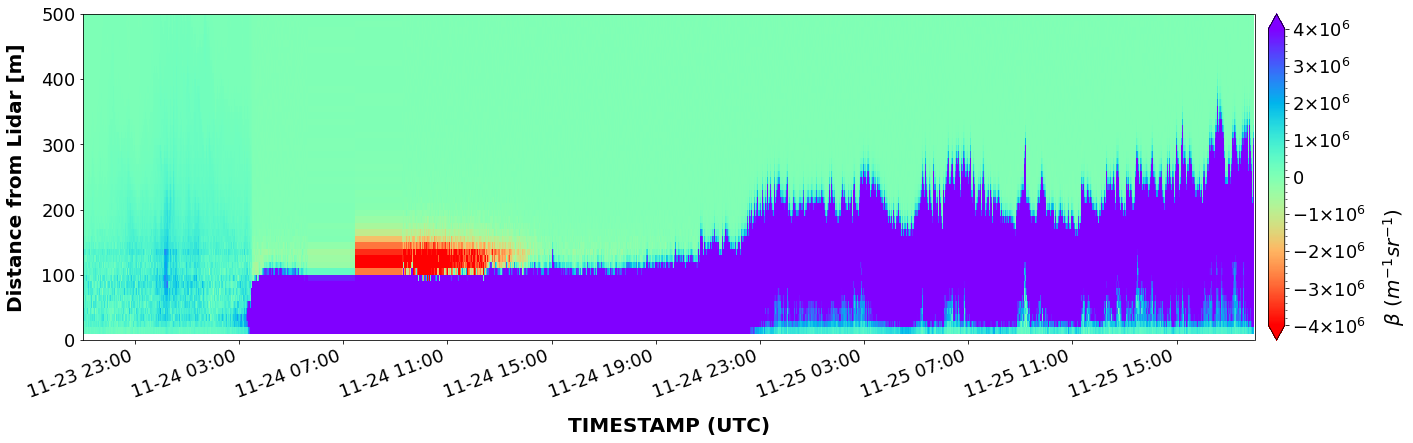

In [146]:
import matplotlib.mlab as mlab
import matplotlib.colors

alpha = df_nov.beta_raw.min()
beta  = df_nov.beta_raw.max()
fig, ax1  = plt.subplots(1, 1, figsize=(25, 6))
surf = df_nov.beta_raw[32939:35424].plot(ax=ax1,x = 'time', robust = True,
                                        cmap = 'rainbow_r',add_colorbar = False,
                                        vmin =-4.0*10**6 ,vmax = 4.0*10**6)
                                                   
ax1.set_ylim([0,500])
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='both', which='minor', labelsize=8)
ax1.tick_params(axis='x', labelrotation= 20)

#ax1.set_xbound(n_d['TIMESTAMP_UTC'][t1-50], n_d['TIMESTAMP_UTC'][t2+50])
ax1.xaxis.set_major_formatter(DateFormatter("%m-%d %H:%M"))
ax1.xaxis.set_major_locator(HourLocator(interval= 4))
ax1.set_ylabel('Distance from Lidar [m]', fontsize=20, labelpad =15,fontweight = 'bold')
ax1.set_xlabel('TIMESTAMP (UTC)',fontsize= 20, labelpad = 15,fontweight = 'bold')

cb = plt.colorbar(surf,orientation="vertical", pad=0.01,
                 format = MathTextSciFormatter('%1.e'),
                 spacing = 'proportional',extend = 'both')
cb.set_label(label='$β$ $(m^{-1} sr^{-1})$', size= 20, weight='bold', 
             loc = 'bottom',labelpad = 15)

cb.ax.tick_params(labelsize= 18)

cb.minorticks_on()
#cb.set_ticks(x)
#norm= matplotlib.colors.Normalize(vmin=surf.cvalues.min(), vmax=surf.cvalues.max())
#sm = plt.cm.ScalarMappable(norm=norm, cmap = surf.cmap)
#sm.set_array([])
#fig.colorbar(sm, ticks=surf.levels)

In [147]:
#df_nov.beta_raw[31679:35424].max(),df_nov.beta_raw[31679:35424].min()
#np.linspace(-14148201.,1.43047974e+09,6)

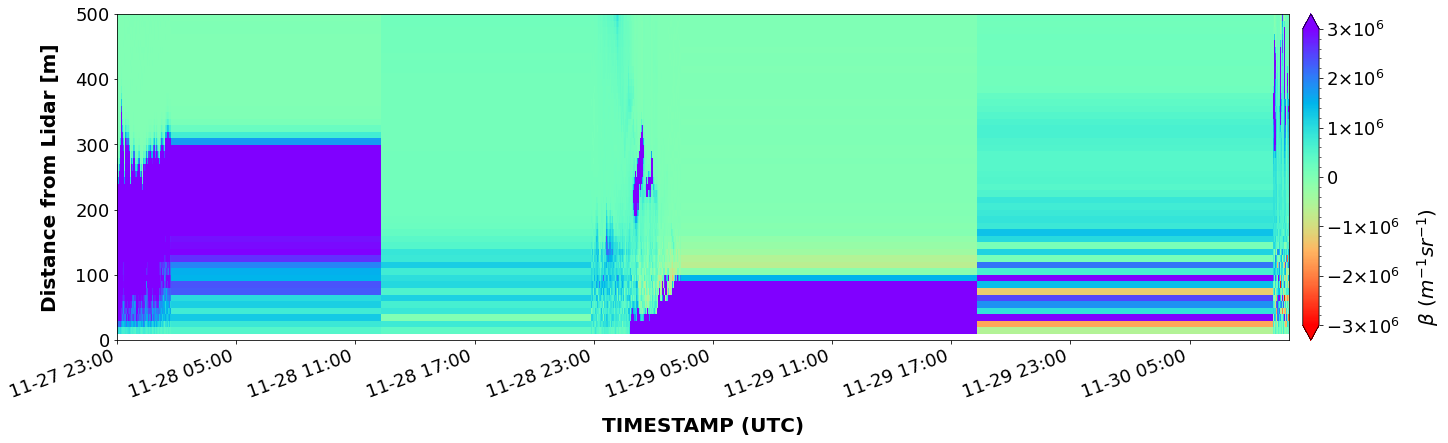

In [148]:
#nov
fig, ax1  = plt.subplots(1, 1, figsize=(25, 6))
surf = df_nov.beta_raw[38604:39095].plot.pcolormesh(ax=ax1,x = 'time', robust = True,
                                                  cmap = 'rainbow_r',add_colorbar = False,
                                                   vmin =-3.0*10**6 ,vmax = 3.0*10**6)

ax1.set_ylim([0,500])
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='both', which='minor', labelsize=8)
ax1.tick_params(axis='x', labelrotation= 20)

#ax1.set_xbound(n_d['TIMESTAMP_UTC'][t3-50], n_d['TIMESTAMP_UTC'][t4+50])
ax1.xaxis.set_major_formatter(DateFormatter("%m-%d %H:%M"))
ax1.xaxis.set_major_locator(HourLocator(interval= 6))
ax1.set_ylabel('Distance from Lidar [m]', fontsize=20, labelpad =15,fontweight='bold')
ax1.set_xlabel('TIMESTAMP (UTC)',fontsize= 20, labelpad = 15,fontweight = 'bold')

cb = plt.colorbar(surf, orientation="vertical", pad=0.01,
                  format = MathTextSciFormatter('%1.e'),
                 spacing = 'proportional',extend = 'both')
cb.set_label(label='$β$ $(m^{-1} sr^{-1})$', size= 20, weight='bold', 
             loc = 'bottom',labelpad = 15)
cb.ax.tick_params(labelsize= 18)
cb.minorticks_on()


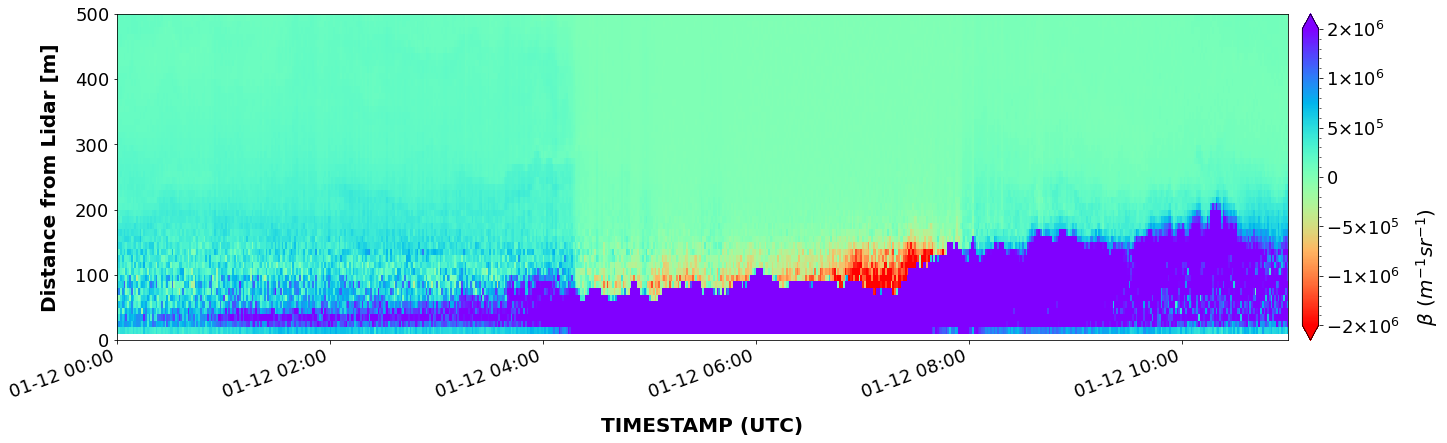

In [149]:
fig, ax1  = plt.subplots(1, 1, figsize=(25, 6))
surf = df_jan.beta_raw[15839:16499].plot.pcolormesh(ax=ax1,x = 'time', robust = True,
                                                  cmap = 'rainbow_r',add_colorbar = False,
                                                   vmin=-1.5*10**6,vmax = 1.5*10**6)
ax1.set_ylim([0,500])
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='both', which='minor', labelsize=8)
ax1.tick_params(axis='x', labelrotation= 20)
#ax1.set_xbound(j_m['TIMESTAMP_UTC'][t7-50], j_m['TIMESTAMP_UTC'][t8+50])

ax1.xaxis.set_major_formatter(DateFormatter("%m-%d %H:%M"))
ax1.xaxis.set_major_locator(HourLocator(interval= 2))
ax1.set_ylabel('Distance from Lidar [m]', fontsize=20, labelpad =15,fontweight='bold' )
ax1.set_xlabel('TIMESTAMP (UTC)',fontsize= 20, labelpad = 15,fontweight = 'bold')

cb = plt.colorbar(surf, orientation="vertical", pad=0.01,
                  format = MathTextSciFormatter('%1.e'),
                 spacing = 'proportional',extend = 'both')
cb.set_label(label='$β$ $(m^{-1} sr^{-1})$', size= 20, weight='bold', 
             loc = 'bottom',labelpad = 15)
cb.ax.tick_params(labelsize= 18)
cb.minorticks_on()

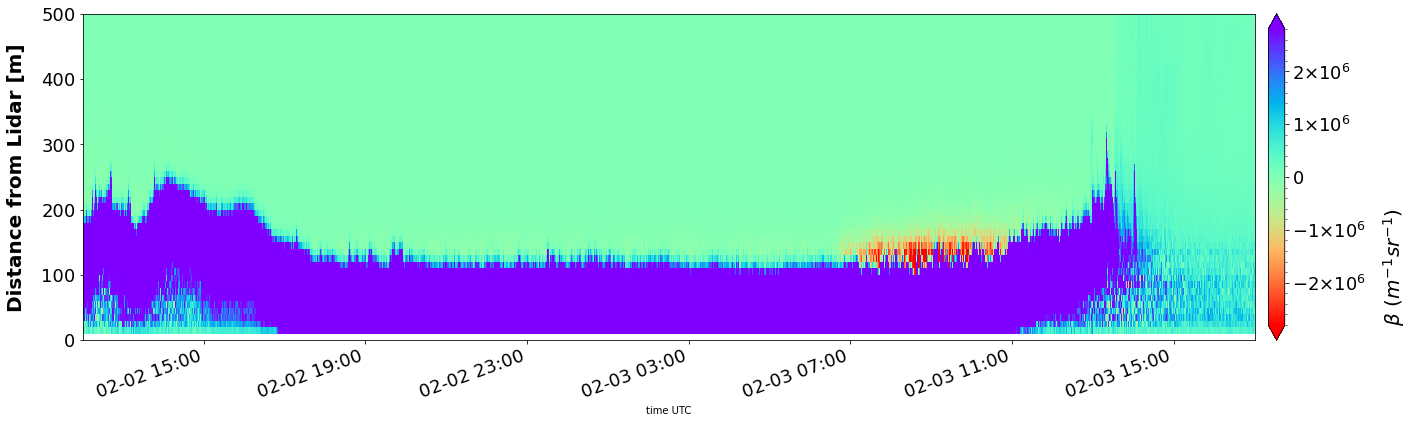

In [150]:
#feb
fig, ax1  = plt.subplots(1, 1, figsize=(25, 6))
surf = df_feb.beta_raw[2160:3900].plot.pcolormesh(ax=ax1,x = 'time', robust = True,
                                                  cmap = 'rainbow_r',add_colorbar = False,
                                                 )
ax1.set_ylim([0,500])
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='both', which='minor', labelsize=8)
ax1.tick_params(axis='x', labelrotation= 20)
#ax1.set_xbound(j_m['TIMESTAMP_UTC'][t9-50], j_m['TIMESTAMP_UTC'][t10+50])

ax1.xaxis.set_major_formatter(DateFormatter("%m-%d %H:%M"))
ax1.xaxis.set_major_locator(HourLocator(interval= 4))
ax1.set_ylabel('Distance from Lidar [m]', fontsize=20, labelpad =15,fontweight='bold')
axi.set_xlabel('TIMESTAMP (UTC)',fontsize= 20, labelpad = 15,fontweight = 'bold')

cb = plt.colorbar(surf, orientation="vertical", 
                  pad=0.01,format = MathTextSciFormatter('%1.e'),
                 spacing = 'proportional',extend = 'both')
cb.set_label(label='$β$ $(m^{-1} sr^{-1})$', size= 20, weight='bold', 
             loc = 'bottom',labelpad = 15)
cb.ax.tick_params(labelsize= 18)
#cb.set_ticklabels()
cb.minorticks_on()

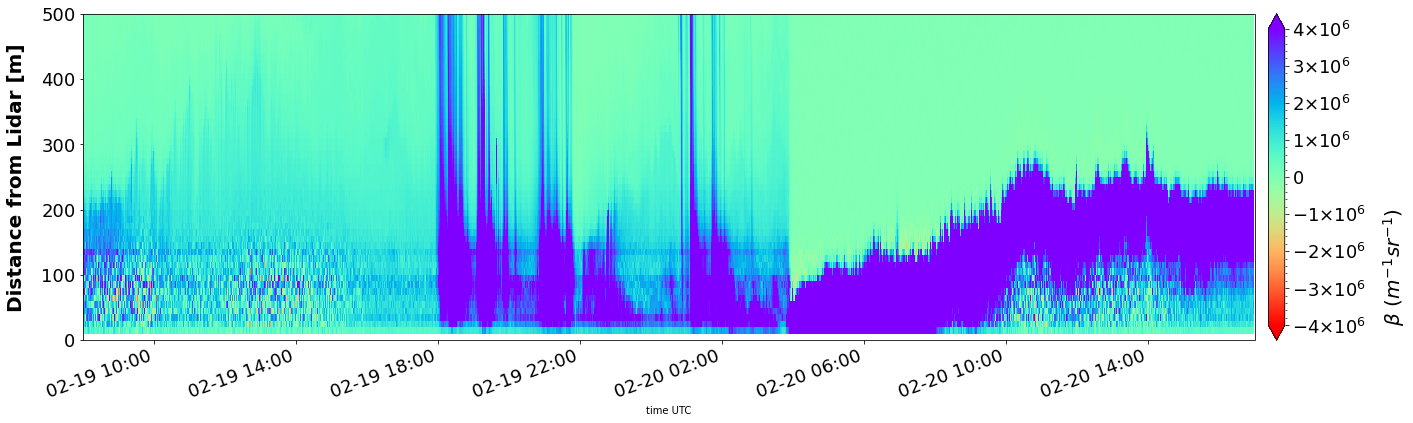

In [151]:
#feb
fig, ax1  = plt.subplots(1, 1, figsize=(25, 6))
surf = df_feb.beta_raw[26399:28379].plot.pcolormesh(ax=ax1,x = 'time', robust = True,
                                                  cmap = 'rainbow_r',add_colorbar = False,
                                                   vmin = -4.0*10**6,vmax = 4.0*10**6)
ax1.set_ylim([0,500])
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='both', which='minor', labelsize=8)
ax1.tick_params(axis='x', labelrotation= 20)

#ax1.set_xbound(j_m['TIMESTAMP_UTC'][t11-50], j_m['TIMESTAMP_UTC'][t12+50])

ax1.xaxis.set_major_formatter(DateFormatter("%m-%d %H:%M"))
ax1.xaxis.set_major_locator(HourLocator(interval= 4))
ax1.set_ylabel('Distance from Lidar [m]', fontsize=20, labelpad =15,fontweight='bold')
axi.set_xlabel('TIMESTAMP (UTC)',fontsize= 20, labelpad = 15,fontweight = 'bold')


cb = plt.colorbar(surf, orientation="vertical", pad=0.01,
                  format = MathTextSciFormatter('%1.e'),
                 spacing = 'proportional', extend = 'both')
cb.set_label(label='$β$ $(m^{-1} sr^{-1})$', size= 20, weight='bold', 
             loc = 'bottom',labelpad = 15)
cb.ax.tick_params(labelsize= 18)
cb.minorticks_on()

In [152]:
###tau and TKE 

In [153]:
##8 jan to 12 jan 2021
tau_jan1= pd.read_csv('/Users/varungandhi/Desktop/eddypro_data/jan/08_01_12_01/eddy_5min/eddypro_csat_full_output_2022-03-18T152936_exp.csv',
                       header= [1,2])
tau_jan1.columns = tau_jan1.columns.map('_'.join)
## 2 feb
tau_feb1 = pd.read_csv('/Users/varungandhi/Desktop/eddypro_data/feb/02_02_06_02/eddy_5min/eddypro_csat_full_output_2022-03-18T152755_exp.csv',
                       header= [1,2])
tau_feb1.columns = tau_feb1.columns.map('_'.join)
## 20 feb
tau_feb1a = pd.read_csv('/Users/varungandhi/Desktop/eddypro_data/feb/17_02_21_02/eddy_5min/eddypro_csat_full_output_2022-03-18T152825_exp.csv',
                       header= [1,2])
tau_feb1a.columns = tau_feb1a.columns.map('_'.join)

tau_nov1 = pd.read_csv('/Users/varungandhi/Desktop/eddypro_data/nov/eddy_out_5/eddypro_csat_full_output_2022-03-11T141139_exp.csv',
                      header= [1,2])
tau_nov1.columns = tau_nov1.columns.map('_'.join)



In [154]:
## merging the column names
tau_jan1['TIMESTAMP'] = tau_jan1['date_[yyyy-mm-dd]'].astype(str)+" "+ tau_jan1['time_[HH:MM]'].astype(str)
tau_feb1['TIMESTAMP'] = tau_feb1['date_[yyyy-mm-dd]'].astype(str)+" "+ tau_feb1['time_[HH:MM]'].astype(str)
tau_nov1['TIMESTAMP'] = tau_nov1['date_[yyyy-mm-dd]'].astype(str)+" "+ tau_nov1['time_[HH:MM]'].astype(str)

tau_feb1a['TIMESTAMP']= tau_feb1a['date_[yyyy-mm-dd]'].astype(str)+" "+tau_feb1a['time_[HH:MM]'].astype(str)


In [155]:
##reading the 30 meter flux file
tau_jan2 = pd.read_excel('/Users/varungandhi/Downloads/python_notebooks/tau_tke.xlsx', sheet_name='jan',
                        header= [0,1])
tau_jan2.columns = tau_jan2.columns.map('_'.join)

tau_feb2 = pd.read_excel('/Users/varungandhi/Downloads/python_notebooks/tau_tke.xlsx', sheet_name='feb',
                        header= [0,1])
tau_feb2.columns = tau_feb2.columns.map('_'.join)

tau_feb2a = pd.read_excel('/Users/varungandhi/Downloads/python_notebooks/tau_tke.xlsx', sheet_name='feb19',
                         header= [0,1])
tau_feb2a.columns = tau_feb2a.columns.map('_'.join)

tau_nov2 = pd.read_excel('/Users/varungandhi/Downloads/python_notebooks/tau_tke.xlsx', sheet_name='nov',
                        header=[0,1])
tau_nov2.columns = tau_nov2.columns.map('_'.join)




In [156]:
tau_jan2['TIMESTAMP'] = tau_jan2['date_[yyyy-mm-dd]'].astype(str)+" "+ tau_jan2['time_[HH:MM]'].astype(str)
tau_jan2 = tau_jan2.drop(tau_jan2.columns[[0, 1]], axis=1)

tau_feb2['TIMESTAMP'] = tau_feb2['date_[yyyy-mm-dd]'].astype(str)+" "+ tau_feb2['time_[HH:MM]'].astype(str)
tau_feb2 = tau_feb2.drop(tau_feb2.columns[[0, 1]], axis=1)

tau_nov2['TIMESTAMP'] = tau_nov2['date_[yyyy-mm-dd]'].astype(str)+" "+ tau_nov2['time_[HH:MM]'].astype(str)
tau_nov2 = tau_nov2.drop(tau_nov2.columns[[0, 1]], axis=1)

tau_feb2a['TIMESTAMP']= tau_feb2a['date_[yyyy-mm-dd]'].astype(str)+" "+tau_feb2a['time_[HH:MM]'].astype(str)
tau_feb2a = tau_feb2a.drop(tau_feb2a.columns[[0, 1]], axis=1)



In [157]:
tau_jan1['TIMESTAMP'] = pd.to_datetime(tau_jan1['TIMESTAMP'])
tau_jan2['TIMESTAMP'] = pd.to_datetime(tau_jan2['TIMESTAMP'])

tau_feb1['TIMESTAMP'] = pd.to_datetime(tau_feb1['TIMESTAMP'])
tau_feb2['TIMESTAMP'] = pd.to_datetime(tau_feb2['TIMESTAMP'])

tau_feb1a['TIMESTAMP'] = pd.to_datetime(tau_feb1a['TIMESTAMP'])
tau_feb2a['TIMESTAMP'] = pd.to_datetime(tau_feb2a['TIMESTAMP'])

tau_nov1['TIMESTAMP'] = pd.to_datetime(tau_nov1['TIMESTAMP'])
tau_nov2['TIMESTAMP'] = pd.to_datetime(tau_nov2['TIMESTAMP'])


x1 = tau_jan1['TIMESTAMP'].values - np.timedelta64(2, 'h')
x2 = tau_feb1['TIMESTAMP'].values - np.timedelta64(2, 'h')
x3 = tau_nov1['TIMESTAMP'].values - np.timedelta64(2, 'h')
x4 = tau_feb1a['TIMESTAMP'].values - np.timedelta64(2,'h')

#y = tau_jan2['TIMESTAMP'].values - np.timedelta64(1, 'h')
tau_jan1['TIMESTAMP'] = x1
tau_feb1['TIMESTAMP'] = x2
tau_nov1['TIMESTAMP'] = x3
tau_feb1a['TIMESTAMP'] = x4




In [158]:
tau_jan = pd.merge(tau_jan1,tau_jan2,on='TIMESTAMP',how = 'left')
tau_feb = pd.merge(tau_feb1,tau_feb2,on='TIMESTAMP',how = 'left')
tau_feba = pd.merge(tau_feb1a,tau_feb2a, on = 'TIMESTAMP', how = 'left')
tau_nov = pd.merge(tau_nov1, tau_nov2, on='TIMESTAMP', how = 'left')

In [159]:
#tau_jan[['TKE_[m+2s-2]']].plot()
#tau_jan['TKE_30_[m+2s-2]'].plot()
#tau_feb[['TKE_[m+2s-2]']].plot()
#tau_feb['TKE_30_[m+2s-2]'].plot()
#tau_feba[['TKE_[m+2s-2]']].plot()
#tau_feba['TKE_30_[m+2s-2]'].plot()
#tau_nov[['TKE_[m+2s-2]']][0:3209].plot()
#tau_nov['TKE_30_[m+2s-2]'][0:3209].plot()
def filtering(df,x,y,z):
    y1 = []
    y2 = []
    for i in range (len(df['TKE_[m+2s-2]'])):
        if df['TKE_30_[m+2s-2]'][i] <= x:
            y1.append(df['TKE_30_[m+2s-2]'][i])
        else:
            y1.append(float('NAN'))
        
        if df['Tau_30_[kg+1m-1s-2]'][i] >= y and df['Tau_30_[kg+1m-1s-2]'][i] <= z :
            y2.append(df['Tau_30_[kg+1m-1s-2]'][i])
            
        else:
            y2.append(float('NAN'))
    return y1,y2

tau_nov['tke_30'], tau_nov['tau_30'] = filtering(tau_nov, 1.2,-0.5,0.5)
tau_feb['tke_30'], tau_feb['tau_30'] = filtering(tau_feb, 1.3,-0.5,0.5)
tau_feba['tke_30'], tau_feba['tau_30'] = filtering(tau_feba, 1.2,-0.5,0.3)

In [160]:
n1 = tau_nov['TIMESTAMP'][785]
n2 = tau_nov['TIMESTAMP'][1014]
n3 = tau_nov['TIMESTAMP'][2199]
n4 = tau_nov['TIMESTAMP'][2286]
n5 = tau_jan['TIMESTAMP'][1227]
n6 = tau_jan['TIMESTAMP'][1267]
n7 = tau_feb['TIMESTAMP'][227]
n8 = tau_feb['TIMESTAMP'][431]
n9 = tau_feba['TIMESTAMP'][933]
n10= tau_feba['TIMESTAMP'][981]

In [161]:
arr = tau_feba['TIMESTAMP'].values
#arr = np.datetime_as_string(arr, unit = 'm')
np.where(arr == y6)

(array([981]),)

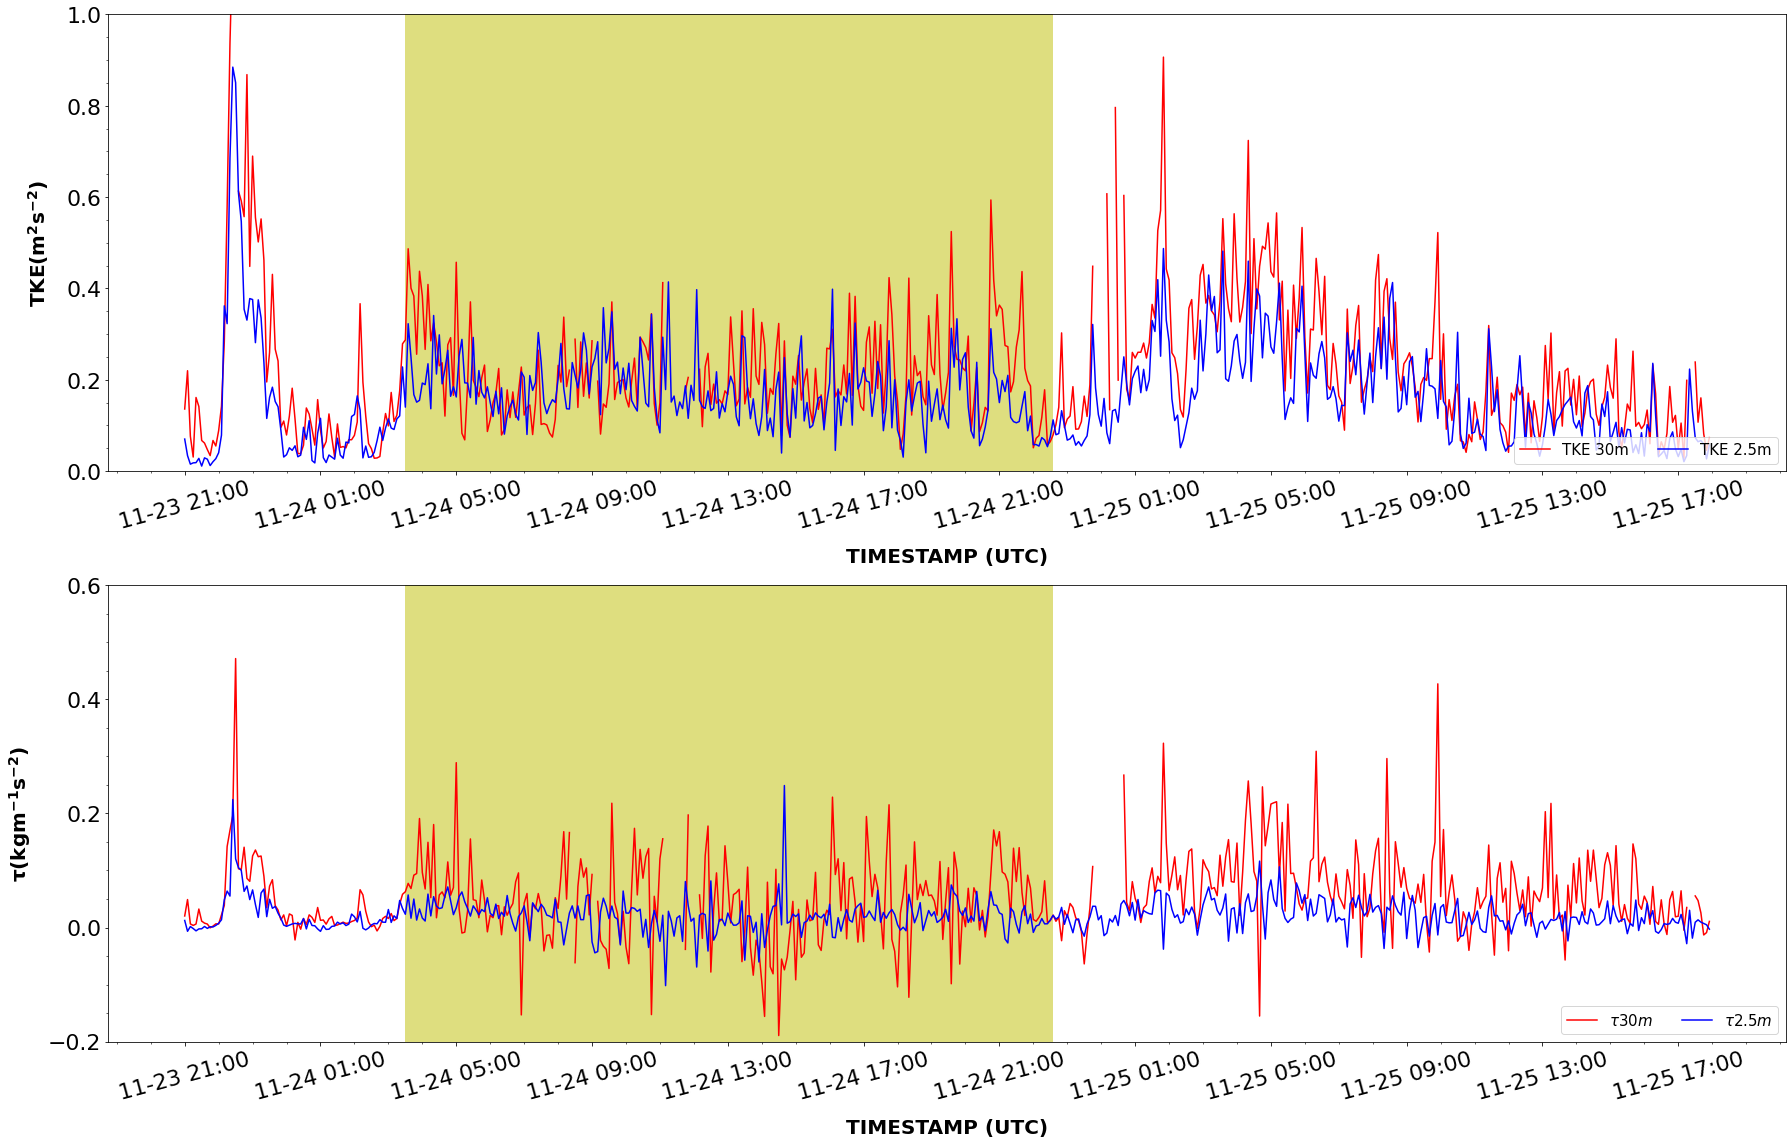

In [163]:
%matplotlib inline
fig,(ax1,ax2) = plt.subplots(2,1,figsize = (25,16),sharex= False)

ax1.plot(tau_nov['TIMESTAMP'][707:1247], tau_nov['tke_30'][707:1247], label = 'TKE 30m', color = 'r')
ax1.plot(tau_nov['TIMESTAMP'][707:1247], tau_nov['TKE_[m+2s-2]'][707:1247], label = 'TKE 2.5m', color = 'b')

ax1.set_ylim([0,1.0])
ax1.set_yticks(np.arange(0,1.1,0.2))
ax1.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax1.set_ylabel(r'$\mathbf{TKE (m^2 s^{-2})}$', fontsize=20, labelpad =15)

ax2.plot(tau_nov['TIMESTAMP'][707:1247], -tau_nov['tau_30'][707:1247], label = '$τ 30m$',  color = 'r')
ax2.plot(tau_nov['TIMESTAMP'][707:1247], -tau_nov['Tau_[kg+1m-1s-2]'][707:1247],label = '$τ 2.5m$', color = 'b')
ax2.set_ylim([-0.2,0.6])
ax2.set_yticks(np.arange(-0.2,0.61,0.2))
ax2.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax2.set_ylabel(r'$\mathbf{τ(kg m^{-1} s^{-2})}$', fontsize=20, labelpad =15)

for axi in (ax1,ax2):
    axi.axvspan(n1, n2, color='y', alpha=0.5, lw=0)
    axi.minorticks_on()
    axi.xaxis.set_major_formatter(DateFormatter("%m-%d %H:%M"))
    axi.tick_params(axis='both', which='major', labelsize=22)
    axi.tick_params(axis='both', which='minor', labelsize=10)
    axi.tick_params(axis='x', labelrotation= 15)
    axi.xaxis.set_major_locator(HourLocator(interval= 4))
    axi.set_xlabel('TIMESTAMP (UTC)', fontsize = 20,fontweight = 'bold',labelpad = 15)
fig.tight_layout()

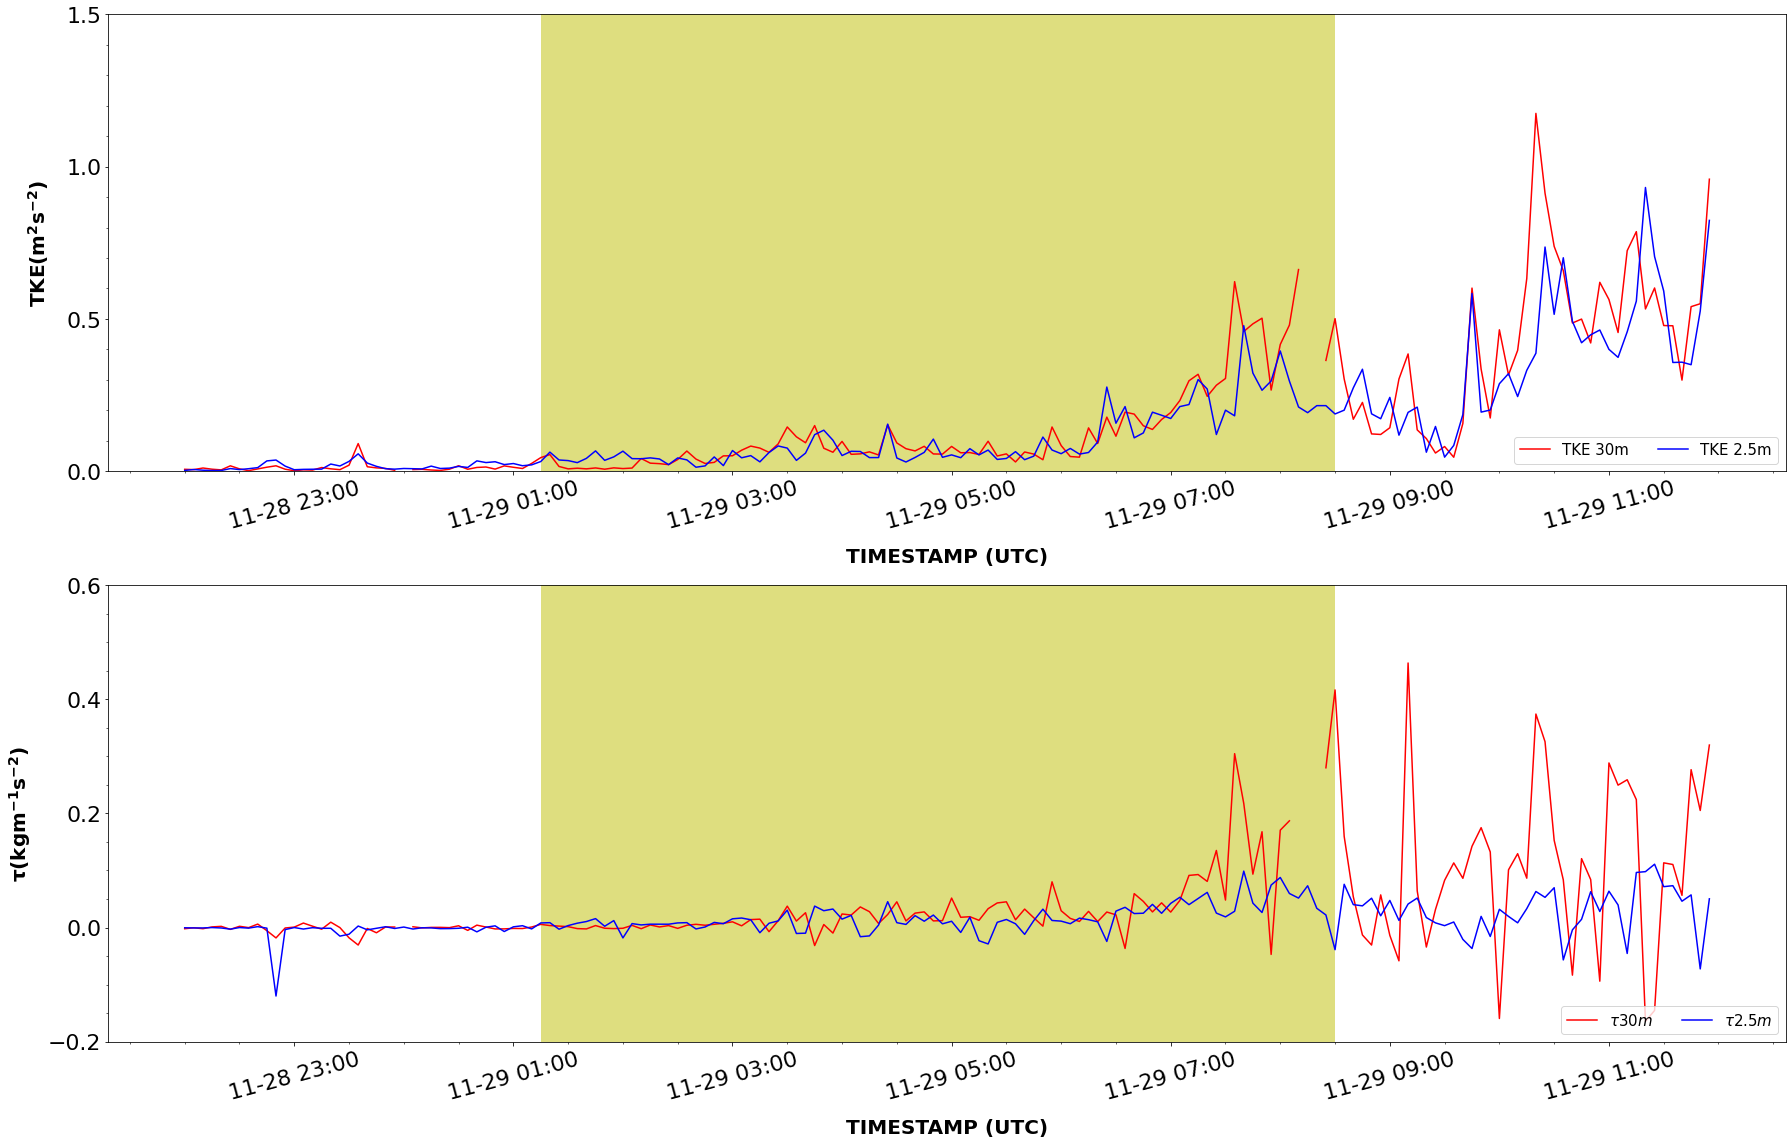

In [169]:
%matplotlib inline
fig,(ax1,ax2) = plt.subplots(2,1,figsize = (25,16),sharex= False)

ax1.plot(tau_nov['TIMESTAMP'][2160:2328], tau_nov['tke_30'][2160:2328], label = 'TKE 30m', color = 'r')
ax1.plot(tau_nov['TIMESTAMP'][2160:2328], tau_nov['TKE_[m+2s-2]'][2160:2328], label = 'TKE 2.5m', color = 'b')

ax1.set_ylim([0,1.5])
ax1.set_yticks(np.arange(0,1.51,0.5))
ax1.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax1.set_ylabel(r'$\mathbf{TKE (m^2 s^{-2})}$', fontsize=20, labelpad =15)

ax2.plot(tau_nov['TIMESTAMP'][2160:2328], -tau_nov['tau_30'][2160:2328], label = '$τ 30m$',  color = 'r')
ax2.plot(tau_nov['TIMESTAMP'][2160:2328], -tau_nov['Tau_[kg+1m-1s-2]'][2160:2328],label = '$τ 2.5m$', color = 'b')
ax2.set_ylim([-0.2,0.6])
ax2.set_yticks(np.arange(-0.2,0.61,0.2))
ax2.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax2.set_ylabel(r'$\mathbf{τ(kg m^{-1} s^{-2})}$', fontsize=20, labelpad =15)

for axi in (ax1,ax2):
    axi.axvspan(n3, n4, color='y', alpha=0.5, lw=0)
    axi.minorticks_on()
    axi.xaxis.set_major_formatter(DateFormatter("%m-%d %H:%M"))
    axi.tick_params(axis='both', which='major', labelsize=22)
    axi.tick_params(axis='both', which='minor', labelsize=10)
    axi.tick_params(axis='x', labelrotation= 15)
    axi.xaxis.set_major_locator(HourLocator(interval= 2))
    axi.set_xlabel('TIMESTAMP (UTC)', fontsize = 20,fontweight = 'bold',labelpad = 15)

fig.tight_layout()

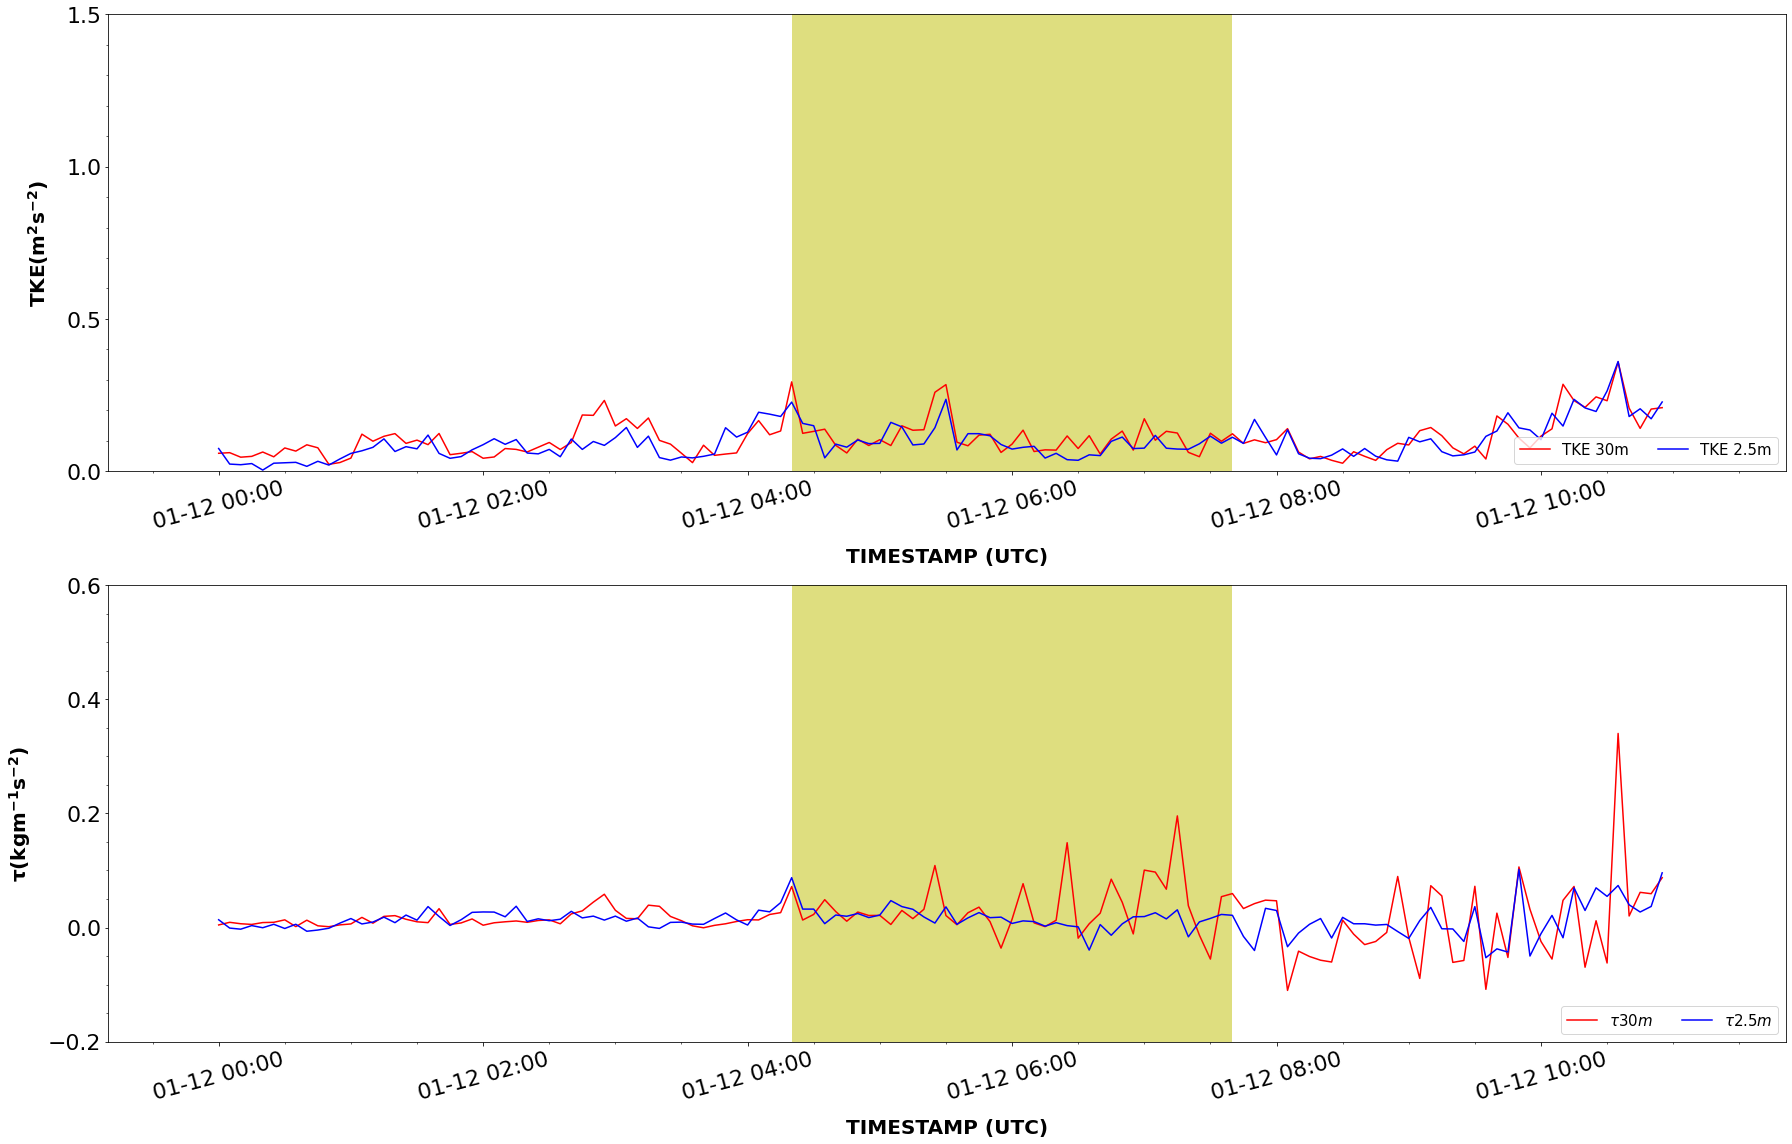

In [173]:
%matplotlib inline
fig,(ax1,ax2) = plt.subplots(2,1,figsize = (25,16),sharex= False)

ax1.plot(tau_jan['TIMESTAMP'][1175:1307], tau_jan['TKE_30_[m+2s-2]'][1175:1307], label = 'TKE 30m', color = 'r')
ax1.plot(tau_jan['TIMESTAMP'][1175:1307], tau_jan['TKE_[m+2s-2]'][1175:1307], label = 'TKE 2.5m', color = 'b')

ax1.set_ylim([0,1.5])
ax1.set_yticks(np.arange(0,1.51,0.5))
ax1.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax1.set_ylabel(r'$\mathbf{TKE (m^2 s^{-2})}$', fontsize=20, labelpad =15)

ax2.plot(tau_jan['TIMESTAMP'][1175:1307], -tau_jan['Tau_30_[kg+1m-1s-2]'][1175:1307], label = '$τ 30m$',  color = 'r')
ax2.plot(tau_jan['TIMESTAMP'][1175:1307], -tau_jan['Tau_[kg+1m-1s-2]'][1175:1307],label = '$τ 2.5m$', color = 'b')
ax2.set_ylim([-0.2,0.6])
ax2.set_yticks(np.arange(-0.2,0.61,0.2))
ax2.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax2.set_ylabel(r'$\mathbf{τ(kg m^{-1} s^{-2})}$', fontsize=20, labelpad =15)

for axi in (ax1,ax2):
    axi.axvspan(n5, n6, color='y', alpha=0.5, lw=0)
    axi.minorticks_on()
    axi.xaxis.set_major_formatter(DateFormatter("%m-%d %H:%M"))
    axi.tick_params(axis='both', which='major', labelsize=22)
    axi.tick_params(axis='both', which='minor', labelsize=10)
    axi.tick_params(axis='x', labelrotation= 15)
    axi.set_xbound(j_m['TIMESTAMP_UTC'][t7-50], j_m['TIMESTAMP_UTC'][t8+50])
    axi.xaxis.set_major_locator(HourLocator(interval= 2))
    axi.set_xlabel('TIMESTAMP (UTC)', fontsize = 20,fontweight = 'bold',labelpad = 15)
fig.tight_layout()

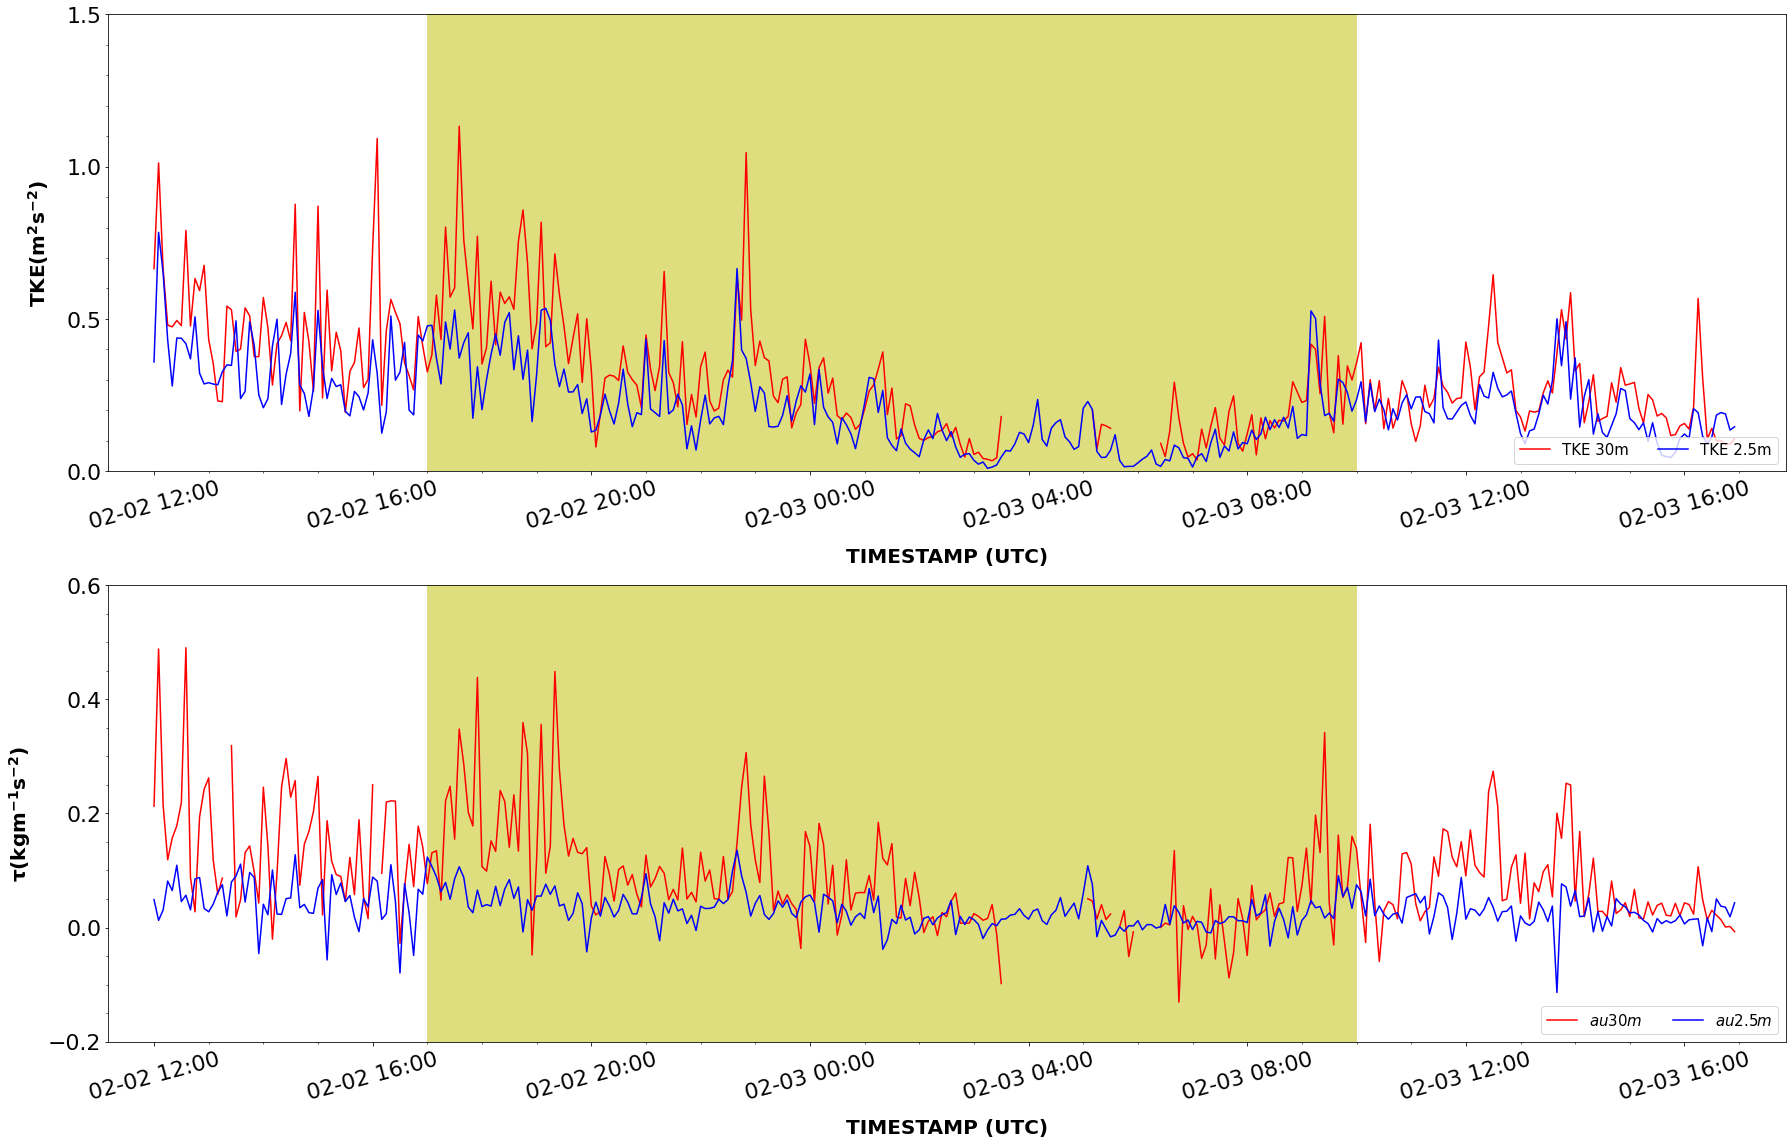

In [175]:
%matplotlib inline
fig,(ax1,ax2) = plt.subplots(2,1,figsize = (25,16),sharex= False)

ax1.plot(tau_feb['TIMESTAMP'][167:515], tau_feb['tke_30'][167:515], label = 'TKE 30m', color = 'r')
ax1.plot(tau_feb['TIMESTAMP'][167:515], tau_feb['TKE_[m+2s-2]'][167:515], label = 'TKE 2.5m', color = 'b')

ax1.set_ylim([0,1.5])
ax1.set_yticks(np.arange(0,1.51,0.5))
ax1.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax1.set_ylabel(r'$\mathbf{TKE (m^2 s^{-2})}$', fontsize=20, labelpad =15)

ax2.plot(tau_feb['TIMESTAMP'][167:515], -tau_feb['tau_30'][167:515], label = '$\tau 30m$',  color = 'r')
ax2.plot(tau_feb['TIMESTAMP'][167:515], -tau_feb['Tau_[kg+1m-1s-2]'][167:515],label = '$\tau 2.5m$', color = 'b')
ax2.set_ylim([-0.2,0.6])
ax2.set_yticks(np.arange(-0.2,0.61,0.2))
ax2.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax2.set_ylabel(r'$\mathbf{τ(kg m^{-1} s^{-2})}$', fontsize=20, labelpad =15)

for axi in (ax1,ax2):
    axi.axvspan(n7, n8, color='y', alpha=0.5, lw=0)
    axi.minorticks_on()
    axi.xaxis.set_major_formatter(DateFormatter("%m-%d %H:%M"))
    axi.tick_params(axis='both', which='major', labelsize=22)
    axi.tick_params(axis='both', which='minor', labelsize=10)
    axi.tick_params(axis='x', labelrotation= 15)
    axi.set_xbound(j_m['TIMESTAMP_UTC'][t9-50], j_m['TIMESTAMP_UTC'][t10+50])
    axi.xaxis.set_major_locator(HourLocator(interval= 4))
    axi.set_xlabel('TIMESTAMP (UTC)', fontsize = 20,fontweight = 'bold',labelpad = 15)
fig.tight_layout()

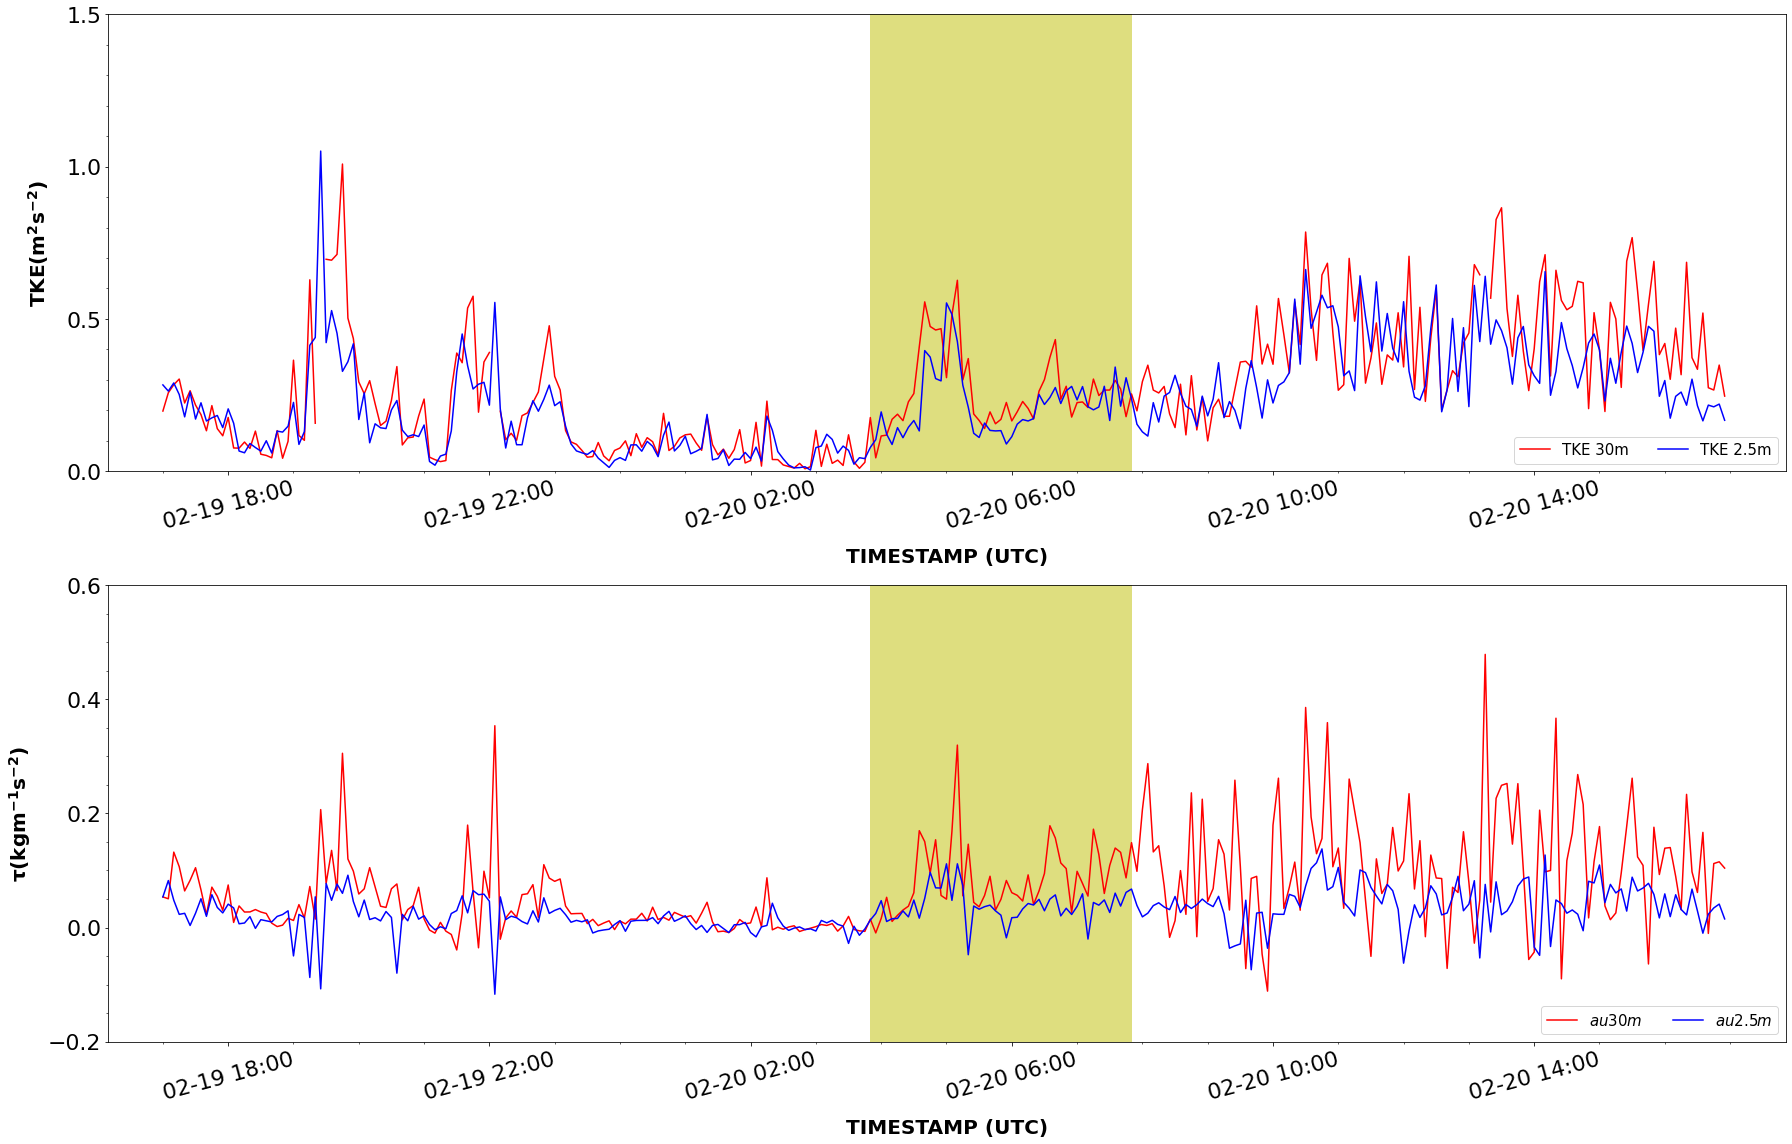

In [176]:
%matplotlib inline
fig,(ax1,ax2) = plt.subplots(2,1,figsize = (25,16),sharex= False)

ax1.plot(tau_feba['TIMESTAMP'][803:1091], tau_feba['tke_30'][803:1091], label = 'TKE 30m', color = 'r')
ax1.plot(tau_feba['TIMESTAMP'][803:1091], tau_feba['TKE_[m+2s-2]'][803:1091], label = 'TKE 2.5m', color = 'b')

ax1.set_ylim([0,1.5])
ax1.set_yticks(np.arange(0,1.51,0.5))
ax1.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax1.set_ylabel(r'$\mathbf{TKE (m^2 s^{-2})}$', fontsize=20, labelpad =15)

ax2.plot(tau_feba['TIMESTAMP'][803:1091], -tau_feba['tau_30'][803:1091], label = '$\tau 30m$',  color = 'r')
ax2.plot(tau_feba['TIMESTAMP'][803:1091], -tau_feba['Tau_[kg+1m-1s-2]'][803:1091],label = '$\tau 2.5m$', color = 'b')
ax2.set_ylim([-0.2,0.6])
ax2.set_yticks(np.arange(-0.2,0.61,0.2))
ax2.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
ax2.set_ylabel(r'$\mathbf{τ(kg m^{-1} s^{-2})}$', fontsize=20, labelpad =15)

for axi in (ax1,ax2):
    axi.axvspan(n9, n10, color='y', alpha=0.5, lw=0)
    axi.minorticks_on()
    axi.xaxis.set_major_formatter(DateFormatter("%m-%d %H:%M"))
    axi.tick_params(axis='both', which='major', labelsize=22)
    axi.tick_params(axis='both', which='minor', labelsize=10)
    axi.tick_params(axis='x', labelrotation= 15)
    axi.set_xbound(j_m['TIMESTAMP_UTC'][t11-50], j_m['TIMESTAMP_UTC'][t12+50])
    axi.xaxis.set_major_locator(HourLocator(interval= 4))
    axi.set_xlabel('TIMESTAMP (UTC)', fontsize = 20,fontweight = 'bold',labelpad = 15)
fig.tight_layout()

In [65]:
#polltuoin

In [246]:
pl = pd.read_csv('/Users/varungandhi/Desktop/data_1/pollution.csv')

for i in range(len(pl['PM2.5'])):
    if type(pl['PM2.5'][i]) ==str:
        if pl['PM2.5'][i] == ' ':
            pl['PM2.5'][i]= pl['PM2.5'][i].replace(' ', '0')
            
    if pl['PM2.5'][i] == '0':
        pl['PM2.5'][i] = float('NAN')

/var/folders/lj/42kjq4jj2lj80_y4pkyqbcwh0000gn/T/ipykernel_886/2600528475.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pl['PM2.5'][i]= pl['PM2.5'][i].replace(' ', '0')
/var/folders/lj/42kjq4jj2lj80_y4pkyqbcwh0000gn/T/ipykernel_886/2600528475.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pl['PM2.5'][i] = float('NAN')


In [248]:
pl['TIMESTAMP'] = pd.to_datetime(pl['TIMESTAMP'])
timee = pl['TIMESTAMP'].values - np.timedelta64(2, 'h')
pl['TIMESTAMP_UTC'] = timee
pl['PM2.5'] = pd.to_numeric(pl['PM2.5'])
p1 = pl['TIMESTAMP_UTC'][1280:1325]
p2 = pl['TIMESTAMP_UTC'][1401:1415]
p3 = pl['TIMESTAMP_UTC'][2454:2465]
p4 = pl['TIMESTAMP_UTC'][2967:2996]
p5 = pl['TIMESTAMP_UTC'][3380:3404]

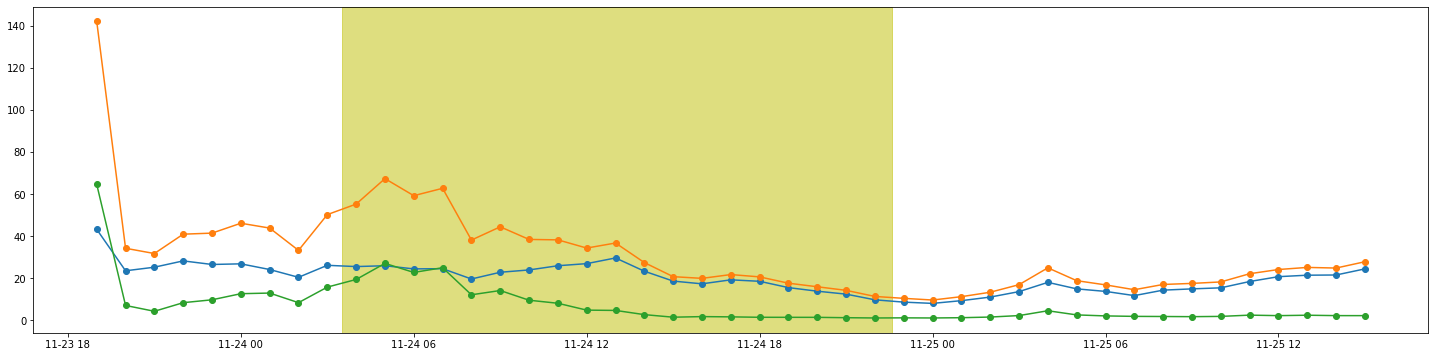

In [251]:
fig,(ax1) = plt.subplots(1,1,figsize = (25,6),sharex= True)
#ax1.plot(p1,pl['SO2' ][1282:1327],label = '$SO_2$', marker = 'o')
ax1.plot(p1,pl['NO2' ][1282:1327],label = '$NO_2$', marker = 'o')
#ax1.plot(p1,pl['CO'  ][1280:1327],label = '$CO$', marker = 'o')
#ax1.plot(p1,pl['O3'  ][1282:1327],label = '$O_3$', marker = 'o')
ax1.plot(p1,pl['NOX' ][1282:1327],label = '$NO_X$', marker = 'o')
ax1.plot(p1,pl['NO'  ][1282:1327],label = '$NO$', marker = 'o')
ax1.axvspan(a,b1, color = 'y', alpha = 0.5)
#ax1.plot(p1,pl['BENZOL'][1282:1327],label = '$BENZOL$', marker = 'o')


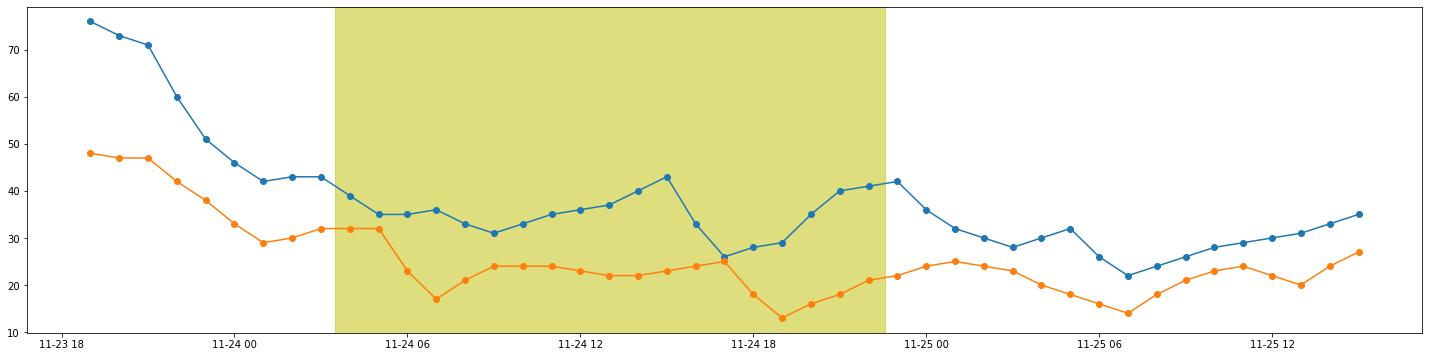

In [253]:
fig,(ax1) = plt.subplots(1,1,figsize = (25,6),sharex= True)
ax1.axvspan(a,b1, color = 'y', alpha = 0.5)
ax1.plot(p1,pl['PM10'  ][1282:1327],label = '$PM_10$', marker = 'o')
ax1.plot(p1,pl['PM2.5' ][1282:1327],label = '$PM_2.5$', marker = 'o')


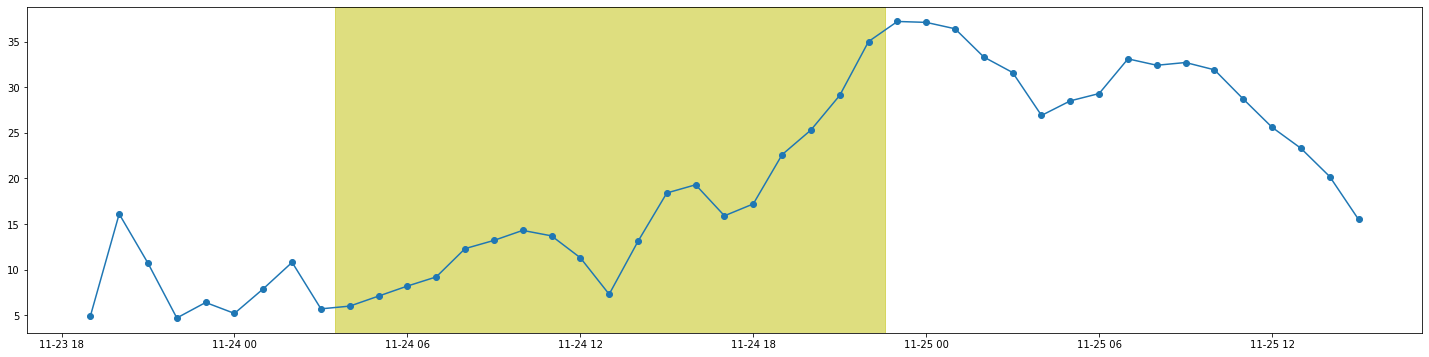

In [255]:
fig,(ax1) = plt.subplots(1,1,figsize = (25,6),sharex= True)
ax1.axvspan(a,b1, color = 'y', alpha = 0.5)
#ax1.plot(p1,pl['SO2' ][1282:1327],label = '$SO_2$', marker = 'o')
#ax1.plot(p1,pl['CO'  ][1282:1327],label = '$CO$', marker = 'o')
ax1.plot(p1,pl['O3'  ][1282:1327],label = '$O_3$', marker = 'o')


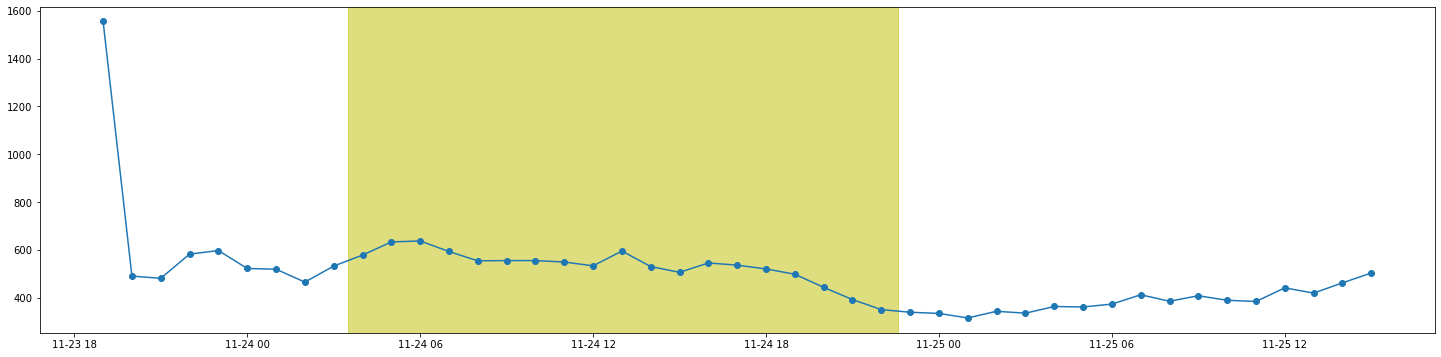

In [257]:
fig,(ax1) = plt.subplots(1,1,figsize = (25,6),sharex= True)
#ax1.plot(p1,pl['SO2' ][1282:1327],label = '$SO_2$', marker = 'o')
ax1.plot(p1,pl['CO'  ][1282:1327],label = '$CO$', marker = 'o')
ax1.axvspan(a,b1, color = 'y', alpha = 0.5)


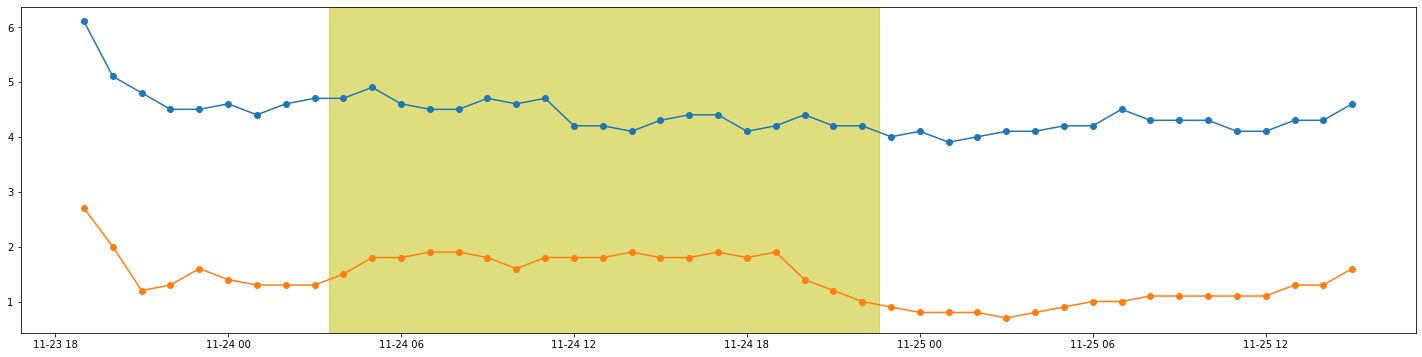

In [258]:
fig,(ax1) = plt.subplots(1,1,figsize = (25,6),sharex= True)
ax1.plot(p1,pl['SO2' ][1282:1327],label = '$SO_2$', marker = 'o')
ax1.axvspan(a,b1, color = 'y', alpha = 0.5)
ax1.plot(p1,pl['BENZOL'][1282:1327],label = '$BENZOL$', marker = 'o')


In [238]:
np.datetime64()

ValueError: Error parsing datetime string "a" at position 0

In [90]:
##pollution
arr = pl['TIMESTAMP'].values
arr = np.datetime_as_string(arr, unit = 'm')
np.where(arr == '2021-02-20T17:00')

(array([3404]),)

In [153]:
for i in pl.columns:
    
    print(type(pl[i][0]))

<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'float'>
<class 'str'>


In [175]:
(pl['PM2.5'][288].replace(' ', '0'))

'0'

In [189]:
pl['PM2.5']

0        NaN
1        9.0
2        9.0
3       11.0
4       11.0
        ... 
5056     8.0
5057     7.0
5058     7.0
5059     7.0
5060     8.0
Name: PM2.5, Length: 5061, dtype: object

In [42]:
float(9)

9.0